**OBS:** Optei por explicar as seções e o código em Português. As *features* do conjunto de dados mantive no idioma original (Inglês).

***Legenda***
*   **Dataset** -> Conjunto de dados.
*   **Features** -> Características dos aplicativos (colunas do conjunto de dados).
* **Samples** -> Exemplos de aplicativos (linhas do conjunto de dados).



**Aluno:** *Lucas Vilanova Barcellos*

Bibliotecas

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tirando o limite de exibição das linhas e colunas do dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Dataset

In [25]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
# Lendo dataset a partir do meu drive
df = pd.read_csv('/content/drive/My Drive/Datasets Collab/Tarefa para candidatos/DataSet_Android_Permissions.csv')
# Lendo dataset a partir do meu computador para o google colab
#df = pd.read_csv('DataSet_Android_Permissions.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,16,17,18,19,21,22,23,25,26,27,28,30,31,32,33,36,37,41,42,43,44,47,49,50,51,52,53,55,56,57,58,59,62,63,65,66,67,68,69,70,71,72,74,75,77,79,81,83,84,85,87,88,89,90,91,94,95,98,99,101,102,103,104,105,106,109,110,111,112,113,114,115,116,117,118,120,121,123,124,125,126,127,129,133,134,135,137,140,142,143,146,147,148,150,151,152,154,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,179,180,181) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card conten

In [27]:
shape_before = df.shape
shape_before

(29999, 182)

# **Limpeza de dados / Data Cleaning**

### **Excluindo colunas e exemplos**

In [28]:
df.isnull().sum()

App                                                                                          15
Package                                                                                      14
Category                                                                                     14
Description                                                                                  17
Rating                                                                                       14
Number of ratings                                                                            14
Price                                                                                        14
Related apps                                                                                768
Default : Access DRM content. (S)                                                            25
Default : Access Email provider data (S)                                                     14
Default : Access all system downloads (S

Excluindo colunas que contenham todos os dados faltantes **NaN**

In [29]:
print('********** Colunas que possuem todos os valores NaN) **********\n')
count_col = 0
for col in df:
  if df[col].isnull().sum() == df.shape[0]:
    df.drop(columns=[col], inplace=True)
    print('Coluna "',col,'" removida')
    count_col += 1
print('\nColunas removidas que possuíam todos os valores NaN:', count_col)

********** Colunas que possuem todos os valores NaN) **********

Coluna " Your accounts : Picasa Web Albums (D) " removida
Coluna " Your accounts : act as the AccountManagerService (S) " removida

Colunas removidas que possuíam todos os valores NaN: 2


In [30]:
df.shape

(29999, 180)

In [31]:
explore_df = df.copy()
explore_df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card conten

Excluindo colunas desnecessárias

In [32]:
explore_df.drop(columns=['Package', 'Description', 'Related apps'], inplace=True)
count_col2 = count_col + 3
print('Quantidade de features já retiradas do dataset:',count_col2)


Quantidade de features já retiradas do dataset: 5


In [33]:
explore_df.isnull().sum()

App                                                                                        15
Category                                                                                   14
Rating                                                                                     14
Number of ratings                                                                          14
Price                                                                                      14
Default : Access DRM content. (S)                                                          25
Default : Access Email provider data (S)                                                   14
Default : Access all system downloads (S)                                                  25
Default : Access download manager. (S)                                                     35
Default : Advanced download manager functions. (S)                                         14
Default : Audio File Access (S)                             

Excluindo as linhas com dados faltantes **NaN**

In [34]:
explore_df.dropna(axis=0, inplace=True)

In [35]:
shape_later = explore_df.shape
shape_later

(29071, 177)

In [36]:
print('Quantidade de exemplos retirados:', (shape_before[0] - shape_later[0]))

Quantidade de exemplos retirados: 928


### **Adequando o conjunto de dados**

>Na ciência dos dados, é crucial o tratamento e a adequação do conjunto de dados para que o modelo de Machine Learning possa realizar os seus cálculos sem problemas.

In [37]:
explore_df.head()

,App,Category,Rating,Number of ratings,Price,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : allow Wi-Fi

#### **Classificando a classe dos aplicativos**

In [38]:
explore_df['Class'].unique()

array(['Benign', 'Malware'], dtype=object)

*   Benign  -> 0
*   Malware -> 1

In [39]:
explore_df.replace('Benign', 0, inplace=True)
explore_df.replace('Malware', 1, inplace=True)

In [40]:
explore_df['Class'].unique()

array([0, 1])

#### **Substituindo os valores por inteiros 0 e 1**

In [41]:
for col in explore_df:
  if explore_df[col].dtype == 'O':
    explore_df[col].replace('False', 0, inplace=True)
    explore_df[col].replace('True', 1, inplace=True)
  if explore_df[col].dtype == 'bool':
    explore_df[col].replace(False, 0, inplace=True)
    explore_df[col].replace(True, 1, inplace=True)

#### **Convertendo valores**

*floats* para *int*

In [42]:
for col in explore_df:
  if explore_df[col].dtype == 'float64':
    explore_df[col] = explore_df[col].astype(int)

*Objects* para *float*

In [43]:
explore_df['Price'] = explore_df['Price'].astype(float)

Ordenando colunas do conjunto de dados

In [44]:
explore_df = explore_df[['App',
 'Class',
 'Category',
 'Price',
 'Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control location update notifications (S)',
 'Default : control system backup and restore (S)',
 'Default : delete applications (S)',
 "Default : delete other applications' caches (S)",
 "Default : delete other applications' data (S)",
 'Default : directly call any phone numbers (S)',
 'Default : directly install applications (S)',
 'Default : disable or modify status bar (S)',
 'Default : discover known accounts (S)',
 'Default : display unauthorized windows (S)',
 'Default : enable or disable application components (S)',
 'Default : force application to close (S)',
 'Default : force device reboot (S)',
 'Default : full Internet access (S)',
 'Default : interact with a device admin (S)',
 'Default : manage application tokens (S)',
 'Default : mock location sources for testing (S)',
 'Default : modify battery statistics (S)',
 'Default : modify secure system settings (S)',
 'Default : modify the Google services map (S)',
 'Default : modify/delete USB storage contents modify/delete SD card contents (S)',
 'Default : monitor and control all application launching (S)',
 'Default : partial shutdown (S)',
 'Default : permanently disable device (S)',
 'Default : permission to install a location provider (S)',
 'Default : power device on or off (S)',
 'Default : press keys and control buttons (S)',
 'Default : prevent app switches (S)',
 'Default : read frame buffer (S)',
 'Default : read instant messages (S)',
 'Default : read phone state and identity (S)',
 'Default : record what you type and actions you take (S)',
 'Default : reset system to factory defaults (S)',
 'Default : run in factory test mode (S)',
 'Default : set time (S)',
 'Default : set wallpaper size hints (S)',
 'Default : start IM service (S)',
 'Default : update component usage statistics (S)',
 'Default : write contact data (S)',
 'Default : write instant messages (S)',
 'Development tools : enable application debugging (D)',
 'Development tools : limit number of running processes (D)',
 'Development tools : make all background applications close (D)',
 'Development tools : send Linux signals to applications (D)',
 'Hardware controls : change your audio settings (D)',
 'Hardware controls : control flashlight (S)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : record audio (D)',
 'Hardware controls : take pictures and videos (D)',
 'Hardware controls : test hardware (S)',
 'Network communication : Broadcast data messages to applications. (S)',
 'Network communication : control Near Field Communication (D)',
 'Network communication : create Bluetooth connections (D)',
 'Network communication : download files without notification (S)',
 'Network communication : full Internet access (D)',
 'Network communication : make/receive Internet calls (D)',
 'Network communication : receive data from Internet (S)',
 'Network communication : view Wi-Fi state (S)',
 'Network communication : view network state (S)',
 'Phone calls : intercept outgoing calls (D)',
 'Phone calls : modify phone state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Services that cost you money : send SMS messages (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : allow Wi-Fi Multicast reception (D)',
 'System tools : automatically start at boot (S)',
 'System tools : bluetooth administration (D)',
 'System tools : change Wi-Fi state (D)',
 'System tools : change background data usage setting (S)',
 'System tools : change network connectivity (D)',
 'System tools : change your UI settings (D)',
 'System tools : delete all application cache data (D)',
 'System tools : disable keylock (D)',
 'System tools : display system-level alerts (D)',
 'System tools : expand/collapse status bar (S)',
 'System tools : force stop other applications (S)',
 'System tools : format external storage (D)',
 'System tools : kill background processes (S)',
 'System tools : make application always run (D)',
 'System tools : measure application storage space (S)',
 'System tools : modify global animation speed (D)',
 'System tools : modify global system settings (D)',
 'System tools : mount and unmount filesystems (D)',
 'System tools : prevent device from sleeping (D)',
 'System tools : read subscribed feeds (S)',
 'System tools : read sync settings (S)',
 'System tools : read sync statistics (S)',
 'System tools : read/write to resources owned by diag (S)',
 'System tools : reorder running applications (D)',
 'System tools : retrieve running applications (D)',
 'System tools : send package removed broadcast (S)',
 'System tools : send sticky broadcast (S)',
 'System tools : set preferred applications (S)',
 'System tools : set time zone (D)',
 'System tools : set wallpaper (S)',
 'System tools : set wallpaper size hints (S)',
 'System tools : write Access Point Name settings (D)',
 'System tools : write subscribed feeds (D)',
 'System tools : write sync settings (D)',
 'Your accounts : Blogger (D)',
 'Your accounts : Google App Engine (D)',
 'Your accounts : Google Docs (D)',
 'Your accounts : Google Finance (D)',
 'Your accounts : Google Maps (D)',
 'Your accounts : Google Spreadsheets (D)',
 'Your accounts : Google Voice (D)',
 'Your accounts : Google mail (D)',
 'Your accounts : YouTube (D)',
 'Your accounts : YouTube usernames (D)',
 'Your accounts : access all Google services (S)',
 'Your accounts : access other Google services (D)',
 'Your accounts : act as an account authenticator (D)',
 'Your accounts : contacts data in Google accounts (D)',
 'Your accounts : discover known accounts (S)',
 'Your accounts : manage the accounts list (D)',
 'Your accounts : read Google service configuration (S)',
 'Your accounts : use the authentication credentials of an account (D)',
 'Your accounts : view configured accounts (S)',
 'Your location : access extra location provider commands (S)',
 'Your location : coarse (network-based) location (D)',
 'Your location : fine (GPS) location (D)',
 'Your location : mock location sources for testing (D)',
 'Your messages : Read Email attachments (D)',
 'Your messages : Send Gmail (S)',
 'Your messages : edit SMS or MMS (D)',
 'Your messages : modify Gmail (D)',
 'Your messages : read Gmail (D)',
 'Your messages : read Gmail attachment previews (D)',
 'Your messages : read SMS or MMS (D)',
 'Your messages : read instant messages (D)',
 'Your messages : receive MMS (D)',
 'Your messages : receive SMS (D)',
 'Your messages : receive WAP (D)',
 'Your messages : send SMS-received broadcast (S)',
 'Your messages : send WAP-PUSH-received broadcast (S)',
 'Your messages : write instant messages (D)',
 'Your personal information : add or modify calendar events and send email to guests (D)',
 'Your personal information : choose widgets (S)',
 "Your personal information : read Browser's history and bookmarks (D)",
 'Your personal information : read calendar events (D)',
 'Your personal information : read contact data (D)',
 'Your personal information : read sensitive log data (D)',
 'Your personal information : read user defined dictionary (D)',
 'Your personal information : retrieve system internal state (S)',
 'Your personal information : set alarm in alarm clock (S)',
 "Your personal information : write Browser's history and bookmarks (D)",
 'Your personal information : write contact data (D)',
 'Your personal information : write to user defined dictionary (S)',
 ]]

**Pronto!** Agora o conjunto de dados está tratado e organizado.

In [45]:
explore_df.head()

,App,Class,Category,Price,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : allow Wi-Fi Multicast receptio

# **Engenharia dos recursos / Feature Engineering**

>O processo de engenharia dos recursos de um conjunto de dados é muito importante, pois a manipulação e/ou criação de novas características podem elevar a qualidade da exploração dos dados e podem também serem relevantes para os cálculos dos modelos, fazendo-o performar melhor.

### **Permissões**

>Aqui iremos criar novas *features* de contagem de permissões com o intuito de nos auxiliar a visualizar as informações através dos dados e ajudar na performance dos modelos. As novas *features* serão:
* **Contagem de permissões perigosas**.
* **Contagem de permissões seguras**.
* **Contagem total de permissões**.

#### Separando permissões seguras e perigosas em datasets diferentes

In [46]:
# Variáveis auxiliares que dão matches nos nome de colunas
danger = '(D)'
safe = '(S)'
# Novos datasets de permissões perigosas e seguras
dangerous_df = pd.DataFrame()
safe_df = pd.DataFrame()
def separate_df_dangerous_and_safe():
  for col in explore_df:
    if danger in col:
      dangerous_df[col] = explore_df[col]
    if safe in col:
      safe_df[col] = explore_df[col]

separate_df_dangerous_and_safe()

>***Pronto!*** Ambos tipos de permissões (seguras e perigosas) estão separadas em *datasets* distintos. Elas nos ajudarão nos seguintes casos:
* Na criação de novas *features* nos códigos a seguir
* Na visualização de gráficos das *features* na seção de **Exploração de Dados**
* Nos cálculos dos modelos de Machine Learning para detectar *malwares*

#### Criando *features* das permissões

*dangerous dataset*

In [47]:
dangerous_df['Dangerous permissions count'] = dangerous_df.loc[:,:].sum(axis=1)

*safe dataset*

In [48]:
safe_df['Safe permissions count'] = safe_df.loc[:,:].sum(axis=1)

#### Adicionando *features* de permissões ao *Dataset*

In [49]:
# Adicioando permissões perigosas
explore_df['Dangerous permissions count'] = dangerous_df['Dangerous permissions count']
# Adicioando permissões seguras
explore_df['Safe permissions count'] = safe_df['Safe permissions count']
# Criando nova feature (Contagem total de permissões)
explore_df['Total count permissions'] = explore_df['Dangerous permissions count'] + explore_df['Safe permissions count'] 

Ordenando colunas

In [50]:
explore_df = explore_df[['App',
 'Class',
 'Category',
 'Price',
 'Dangerous permissions count',
 'Safe permissions count',
 'Total count permissions',
 'Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control location update notifications (S)',
 'Default : control system backup and restore (S)',
 'Default : delete applications (S)',
 "Default : delete other applications' caches (S)",
 "Default : delete other applications' data (S)",
 'Default : directly call any phone numbers (S)',
 'Default : directly install applications (S)',
 'Default : disable or modify status bar (S)',
 'Default : discover known accounts (S)',
 'Default : display unauthorized windows (S)',
 'Default : enable or disable application components (S)',
 'Default : force application to close (S)',
 'Default : force device reboot (S)',
 'Default : full Internet access (S)',
 'Default : interact with a device admin (S)',
 'Default : manage application tokens (S)',
 'Default : mock location sources for testing (S)',
 'Default : modify battery statistics (S)',
 'Default : modify secure system settings (S)',
 'Default : modify the Google services map (S)',
 'Default : modify/delete USB storage contents modify/delete SD card contents (S)',
 'Default : monitor and control all application launching (S)',
 'Default : partial shutdown (S)',
 'Default : permanently disable device (S)',
 'Default : permission to install a location provider (S)',
 'Default : power device on or off (S)',
 'Default : press keys and control buttons (S)',
 'Default : prevent app switches (S)',
 'Default : read frame buffer (S)',
 'Default : read instant messages (S)',
 'Default : read phone state and identity (S)',
 'Default : record what you type and actions you take (S)',
 'Default : reset system to factory defaults (S)',
 'Default : run in factory test mode (S)',
 'Default : set time (S)',
 'Default : set wallpaper size hints (S)',
 'Default : start IM service (S)',
 'Default : update component usage statistics (S)',
 'Default : write contact data (S)',
 'Default : write instant messages (S)',
 'Development tools : enable application debugging (D)',
 'Development tools : limit number of running processes (D)',
 'Development tools : make all background applications close (D)',
 'Development tools : send Linux signals to applications (D)',
 'Hardware controls : change your audio settings (D)',
 'Hardware controls : control flashlight (S)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : record audio (D)',
 'Hardware controls : take pictures and videos (D)',
 'Hardware controls : test hardware (S)',
 'Network communication : Broadcast data messages to applications. (S)',
 'Network communication : control Near Field Communication (D)',
 'Network communication : create Bluetooth connections (D)',
 'Network communication : download files without notification (S)',
 'Network communication : full Internet access (D)',
 'Network communication : make/receive Internet calls (D)',
 'Network communication : receive data from Internet (S)',
 'Network communication : view Wi-Fi state (S)',
 'Network communication : view network state (S)',
 'Phone calls : intercept outgoing calls (D)',
 'Phone calls : modify phone state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Services that cost you money : send SMS messages (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : allow Wi-Fi Multicast reception (D)',
 'System tools : automatically start at boot (S)',
 'System tools : bluetooth administration (D)',
 'System tools : change Wi-Fi state (D)',
 'System tools : change background data usage setting (S)',
 'System tools : change network connectivity (D)',
 'System tools : change your UI settings (D)',
 'System tools : delete all application cache data (D)',
 'System tools : disable keylock (D)',
 'System tools : display system-level alerts (D)',
 'System tools : expand/collapse status bar (S)',
 'System tools : force stop other applications (S)',
 'System tools : format external storage (D)',
 'System tools : kill background processes (S)',
 'System tools : make application always run (D)',
 'System tools : measure application storage space (S)',
 'System tools : modify global animation speed (D)',
 'System tools : modify global system settings (D)',
 'System tools : mount and unmount filesystems (D)',
 'System tools : prevent device from sleeping (D)',
 'System tools : read subscribed feeds (S)',
 'System tools : read sync settings (S)',
 'System tools : read sync statistics (S)',
 'System tools : read/write to resources owned by diag (S)',
 'System tools : reorder running applications (D)',
 'System tools : retrieve running applications (D)',
 'System tools : send package removed broadcast (S)',
 'System tools : send sticky broadcast (S)',
 'System tools : set preferred applications (S)',
 'System tools : set time zone (D)',
 'System tools : set wallpaper (S)',
 'System tools : set wallpaper size hints (S)',
 'System tools : write Access Point Name settings (D)',
 'System tools : write subscribed feeds (D)',
 'System tools : write sync settings (D)',
 'Your accounts : Blogger (D)',
 'Your accounts : Google App Engine (D)',
 'Your accounts : Google Docs (D)',
 'Your accounts : Google Finance (D)',
 'Your accounts : Google Maps (D)',
 'Your accounts : Google Spreadsheets (D)',
 'Your accounts : Google Voice (D)',
 'Your accounts : Google mail (D)',
 'Your accounts : YouTube (D)',
 'Your accounts : YouTube usernames (D)',
 'Your accounts : access all Google services (S)',
 'Your accounts : access other Google services (D)',
 'Your accounts : act as an account authenticator (D)',
 'Your accounts : contacts data in Google accounts (D)',
 'Your accounts : discover known accounts (S)',
 'Your accounts : manage the accounts list (D)',
 'Your accounts : read Google service configuration (S)',
 'Your accounts : use the authentication credentials of an account (D)',
 'Your accounts : view configured accounts (S)',
 'Your location : access extra location provider commands (S)',
 'Your location : coarse (network-based) location (D)',
 'Your location : fine (GPS) location (D)',
 'Your location : mock location sources for testing (D)',
 'Your messages : Read Email attachments (D)',
 'Your messages : Send Gmail (S)',
 'Your messages : edit SMS or MMS (D)',
 'Your messages : modify Gmail (D)',
 'Your messages : read Gmail (D)',
 'Your messages : read Gmail attachment previews (D)',
 'Your messages : read SMS or MMS (D)',
 'Your messages : read instant messages (D)',
 'Your messages : receive MMS (D)',
 'Your messages : receive SMS (D)',
 'Your messages : receive WAP (D)',
 'Your messages : send SMS-received broadcast (S)',
 'Your messages : send WAP-PUSH-received broadcast (S)',
 'Your messages : write instant messages (D)',
 'Your personal information : add or modify calendar events and send email to guests (D)',
 'Your personal information : choose widgets (S)',
 "Your personal information : read Browser's history and bookmarks (D)",
 'Your personal information : read calendar events (D)',
 'Your personal information : read contact data (D)',
 'Your personal information : read sensitive log data (D)',
 'Your personal information : read user defined dictionary (D)',
 'Your personal information : retrieve system internal state (S)',
 'Your personal information : set alarm in alarm clock (S)',
 "Your personal information : write Browser's history and bookmarks (D)",
 'Your personal information : write contact data (D)',
 'Your personal information : write to user defined dictionary (S)',
 ]]

In [51]:
explore_df.head()

,App,Class,Category,Price,Dangerous permissions count,Safe permissions count,Total count permissions,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modif

***Pronto!*** As *features* da contagem de permissões foram criadas.

### **Categorias pagas e gratuitas**

>Aqui iremos criar *features* que nos auxiliarão a visualizar como os aplicativos maliciosos estão distribuídos no mercado.
>Essas *features* serão:
* **Pago/Gratuito** - classificará os aplicativos em "Pagos" ou "Gratuitos".
* **Classificação das categorias** - nos auxiliará no sentido de objetivar as categorias.

#### Pago ou Gratuito - Free/Pay

##### Classificando os aplicativos em *Pagos (pay)* ou *Grauitos (free)*

In [52]:
# Função que classifica o aplicativo em pago ou grauito
def pay_or_free(row):
  if row in [0.]:
    return 'Free'
  if row > 0.0:
    return 'Pay'

# Criando nova feature 
explore_df['Pay/Free'] = explore_df['Price'].apply(pay_or_free)

In [53]:
explore_df['Pay/Free'].value_counts()

Free    23565
Pay      5506
Name: Pay/Free, dtype: int64

>A *feature* **Pay/Free** virá a acrescentar na próxima seção, a **Exploração de Dados**.

##### Categorias

In [54]:
explore_df['Category'].unique()

array(['Brain & Puzzle', 'Social', 'Health & Fitness', 'Entertainment',
       'Casual', 'Media & Video', 'Arcade & Action', 'Finance',
       'Cards & Casino', 'Music & Audio', 'Books & Reference', 'Tools',
       'Education', 'Shopping', 'Travel & Local', 'Transportation',
       'Libraries & Demo', 'Productivity', 'Sports', 'Communication',
       'Lifestyle', 'Business', 'Medical', 'Sports Games', 'Racing',
       'Comics', 'Weather', 'Personalization', 'News & Magazines',
       'Photography'], dtype=object)

Função para classificar as categorias

In [55]:
def category_classification(row):
    if row in 'Brain & Puzzle':
      return 'Games'
    if row in 'Cards & Casino':
      return 'Games'
    if row in 'Arcade & Action':
      return 'Games'
    if row in 'Sports Games':
      return 'Games'
    if row in 'Business':
      return 'Business'
    if row in 'Finance':
      return 'Business'
    if row in 'Libraries & Demo':
      return 'Entertainment'
    if row in 'Casual':
      return 'Entertainment'
    if row in 'Media & Video':
      return 'Entertainment'
    if row in 'Music & Audio':
      return 'Entertainment'
    if row in 'Books & Reference':
      return 'Entertainment'
    if row in 'Comics':
      return 'Entertainment'
    if row in 'News & Magazines':
      return 'Entertainment'
    if row in 'Photography':
      return 'Entertainment'
    if row in 'Sports':
      return 'Entertainment'
    if row in 'Racing':
      return 'Entertainment'
    if row in 'Social':
      return 'Entertainment'
    if row in 'Entertainment':
      return 'Entertainment'
    if row in 'Health & Fitness':
      return 'Health'
    if row in 'Lifestyle':
      return 'Health'
    if row in 'Productivity':
      return 'Health'
    if row in 'Medical':
      return 'Health'
    if row in 'Communication':
      return 'Tools'
    if row in 'Transportation':
      return 'Tools'
    if row in 'Weather':
      return 'Tools'
    if row in 'Education':
      return 'Tools'
    if row in 'Travel & Local':
      return 'Tools'
    if row in 'Personalization':
      return 'Tools'
    if row in 'Tools':
      return 'Tools'
    if row in 'Shopping':
      return 'Shopping'

Classificando categorias

In [56]:
explore_df['Category classification'] = explore_df['Category'].apply(category_classification)

In [57]:
explore_df['Category classification'].unique()

array(['Games', 'Entertainment', 'Health', 'Business', 'Tools',
       'Shopping'], dtype=object)

***Pronto!*** As categorias foram classificadas e reduzidas em 80% nessa nova *feature*, de 30 categorias para apenas 6. Essa *feature* acrescentará na próxima seção, a **Exploração de Dados**.


##### Ordenando colunas do dataset

In [58]:
explore_df = explore_df[['App',
 'Class',
 'Category',
 'Category classification',
 'Price',
 'Pay/Free',
 'Dangerous permissions count',
 'Safe permissions count',
 'Total count permissions',
 'Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control location update notifications (S)',
 'Default : control system backup and restore (S)',
 'Default : delete applications (S)',
 "Default : delete other applications' caches (S)",
 "Default : delete other applications' data (S)",
 'Default : directly call any phone numbers (S)',
 'Default : directly install applications (S)',
 'Default : disable or modify status bar (S)',
 'Default : discover known accounts (S)',
 'Default : display unauthorized windows (S)',
 'Default : enable or disable application components (S)',
 'Default : force application to close (S)',
 'Default : force device reboot (S)',
 'Default : full Internet access (S)',
 'Default : interact with a device admin (S)',
 'Default : manage application tokens (S)',
 'Default : mock location sources for testing (S)',
 'Default : modify battery statistics (S)',
 'Default : modify secure system settings (S)',
 'Default : modify the Google services map (S)',
 'Default : modify/delete USB storage contents modify/delete SD card contents (S)',
 'Default : monitor and control all application launching (S)',
 'Default : partial shutdown (S)',
 'Default : permanently disable device (S)',
 'Default : permission to install a location provider (S)',
 'Default : power device on or off (S)',
 'Default : press keys and control buttons (S)',
 'Default : prevent app switches (S)',
 'Default : read frame buffer (S)',
 'Default : read instant messages (S)',
 'Default : read phone state and identity (S)',
 'Default : record what you type and actions you take (S)',
 'Default : reset system to factory defaults (S)',
 'Default : run in factory test mode (S)',
 'Default : set time (S)',
 'Default : set wallpaper size hints (S)',
 'Default : start IM service (S)',
 'Default : update component usage statistics (S)',
 'Default : write contact data (S)',
 'Default : write instant messages (S)',
 'Development tools : enable application debugging (D)',
 'Development tools : limit number of running processes (D)',
 'Development tools : make all background applications close (D)',
 'Development tools : send Linux signals to applications (D)',
 'Hardware controls : change your audio settings (D)',
 'Hardware controls : control flashlight (S)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : record audio (D)',
 'Hardware controls : take pictures and videos (D)',
 'Hardware controls : test hardware (S)',
 'Network communication : Broadcast data messages to applications. (S)',
 'Network communication : control Near Field Communication (D)',
 'Network communication : create Bluetooth connections (D)',
 'Network communication : download files without notification (S)',
 'Network communication : full Internet access (D)',
 'Network communication : make/receive Internet calls (D)',
 'Network communication : receive data from Internet (S)',
 'Network communication : view Wi-Fi state (S)',
 'Network communication : view network state (S)',
 'Phone calls : intercept outgoing calls (D)',
 'Phone calls : modify phone state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you money : directly call phone numbers (D)',
 'Services that cost you money : send SMS messages (D)',
 'Storage : modify/delete USB storage contents modify/delete SD card contents (D)',
 'System tools : allow Wi-Fi Multicast reception (D)',
 'System tools : automatically start at boot (S)',
 'System tools : bluetooth administration (D)',
 'System tools : change Wi-Fi state (D)',
 'System tools : change background data usage setting (S)',
 'System tools : change network connectivity (D)',
 'System tools : change your UI settings (D)',
 'System tools : delete all application cache data (D)',
 'System tools : disable keylock (D)',
 'System tools : display system-level alerts (D)',
 'System tools : expand/collapse status bar (S)',
 'System tools : force stop other applications (S)',
 'System tools : format external storage (D)',
 'System tools : kill background processes (S)',
 'System tools : make application always run (D)',
 'System tools : measure application storage space (S)',
 'System tools : modify global animation speed (D)',
 'System tools : modify global system settings (D)',
 'System tools : mount and unmount filesystems (D)',
 'System tools : prevent device from sleeping (D)',
 'System tools : read subscribed feeds (S)',
 'System tools : read sync settings (S)',
 'System tools : read sync statistics (S)',
 'System tools : read/write to resources owned by diag (S)',
 'System tools : reorder running applications (D)',
 'System tools : retrieve running applications (D)',
 'System tools : send package removed broadcast (S)',
 'System tools : send sticky broadcast (S)',
 'System tools : set preferred applications (S)',
 'System tools : set time zone (D)',
 'System tools : set wallpaper (S)',
 'System tools : set wallpaper size hints (S)',
 'System tools : write Access Point Name settings (D)',
 'System tools : write subscribed feeds (D)',
 'System tools : write sync settings (D)',
 'Your accounts : Blogger (D)',
 'Your accounts : Google App Engine (D)',
 'Your accounts : Google Docs (D)',
 'Your accounts : Google Finance (D)',
 'Your accounts : Google Maps (D)',
 'Your accounts : Google Spreadsheets (D)',
 'Your accounts : Google Voice (D)',
 'Your accounts : Google mail (D)',
 'Your accounts : YouTube (D)',
 'Your accounts : YouTube usernames (D)',
 'Your accounts : access all Google services (S)',
 'Your accounts : access other Google services (D)',
 'Your accounts : act as an account authenticator (D)',
 'Your accounts : contacts data in Google accounts (D)',
 'Your accounts : discover known accounts (S)',
 'Your accounts : manage the accounts list (D)',
 'Your accounts : read Google service configuration (S)',
 'Your accounts : use the authentication credentials of an account (D)',
 'Your accounts : view configured accounts (S)',
 'Your location : access extra location provider commands (S)',
 'Your location : coarse (network-based) location (D)',
 'Your location : fine (GPS) location (D)',
 'Your location : mock location sources for testing (D)',
 'Your messages : Read Email attachments (D)',
 'Your messages : Send Gmail (S)',
 'Your messages : edit SMS or MMS (D)',
 'Your messages : modify Gmail (D)',
 'Your messages : read Gmail (D)',
 'Your messages : read Gmail attachment previews (D)',
 'Your messages : read SMS or MMS (D)',
 'Your messages : read instant messages (D)',
 'Your messages : receive MMS (D)',
 'Your messages : receive SMS (D)',
 'Your messages : receive WAP (D)',
 'Your messages : send SMS-received broadcast (S)',
 'Your messages : send WAP-PUSH-received broadcast (S)',
 'Your messages : write instant messages (D)',
 'Your personal information : add or modify calendar events and send email to guests (D)',
 'Your personal information : choose widgets (S)',
 "Your personal information : read Browser's history and bookmarks (D)",
 'Your personal information : read calendar events (D)',
 'Your personal information : read contact data (D)',
 'Your personal information : read sensitive log data (D)',
 'Your personal information : read user defined dictionary (D)',
 'Your personal information : retrieve system internal state (S)',
 'Your personal information : set alarm in alarm clock (S)',
 "Your personal information : write Browser's history and bookmarks (D)",
 'Your personal information : write contact data (D)',
 'Your personal information : write to user defined dictionary (S)',
 ]]

In [59]:
explore_df.head()

,App,Class,Category,Category classification,Price,Pay/Free,Dangerous permissions count,Safe permissions count,Total count permissions,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/

In [60]:
shape_features = explore_df.shape
shape_features

(29071, 180)

In [61]:
print('Foram criadas',(shape_features[1]-shape_later[1]),'novas features!')

Foram criadas 3 novas features!


# **Exploração de dados / Data Exploration**

>Nessa seção é onde iremos estudar nosso conjunto de dados com o auxílio de gráficos.

### **Balanceamento**

Quantidade de aplicativos Malignos e Benignos

[Text(0, 0.5, 'Quantidade de aplicativos'),
 Text(0.5, 0, 'Classificação dos aplicativos')]

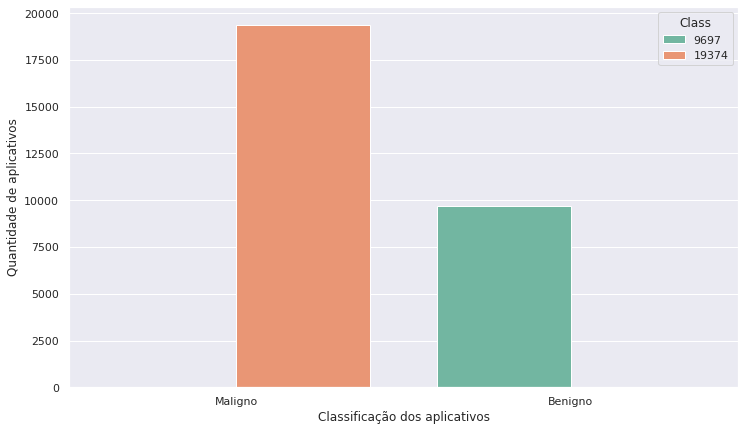

In [62]:
values = explore_df['Class'].value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Maligno","Benigno"], y = values, hue = values, palette = "Set2").set(xlabel='Classificação dos aplicativos', ylabel='Quantidade de aplicativos')

In [63]:
balance = explore_df['Class'].value_counts()[1] / explore_df['Class'].value_counts()[0]
print('Balanceamento  --->  Benigno',balance,'1 Maligno')

Balanceamento  --->  Benigno 1.9979375064452924 1 Maligno


>Essas informações mostram que o conjunto de dados está desbalanceado, possuindo aproximadamente 2 aplicativos malignos para cada 1 benigno. Na próxima seção isso será abordado novamente.

### **Top Permissões**

#### Top 10 Permissões seguras e perigosas mais utilizadas pelos aplicativos

In [64]:
safe_permissions_sum = safe_df.drop(columns=['Safe permissions count']).sum().loc[:,]
top_safe_permissions = safe_permissions_sum.sort_values(ascending=False)[:10]

In [65]:
dangerous_permissions_sum = dangerous_df.drop(columns=['Dangerous permissions count']).sum().loc[:,]
top_dangerous_permissions = dangerous_permissions_sum.sort_values(ascending=False)[:10]

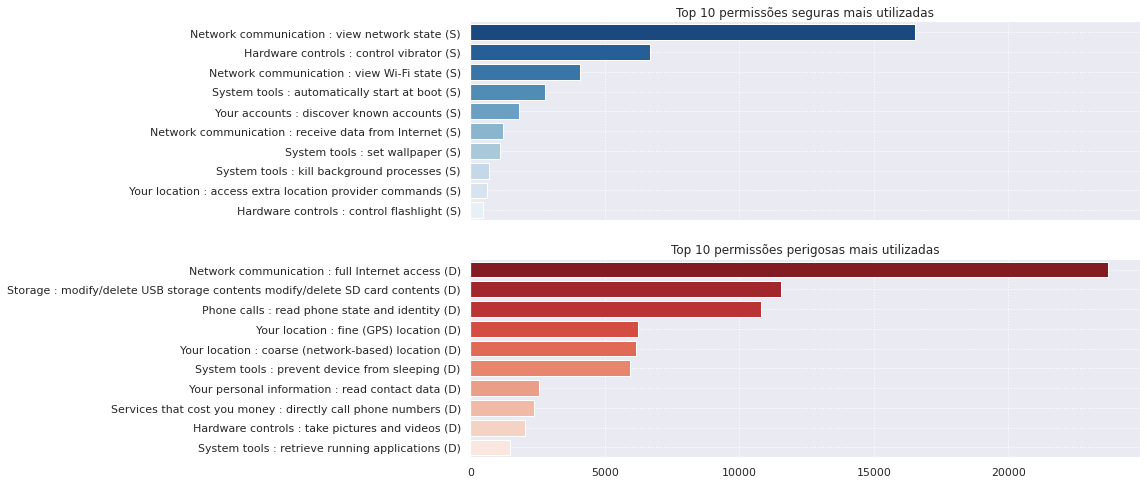

In [66]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=top_safe_permissions.index, x=top_safe_permissions.values, palette="Blues_r", ax=axs[0])
axs[0].set_title('Top 10 permissões seguras mais utilizadas')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=top_dangerous_permissions.index, x=top_dangerous_permissions.values, palette='Reds_r', ax=axs[1])
axs[1].set_title('Top 10 permissões perigosas mais utilizadas')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

>Podemos analisar que a permissão perigosa que os aplicativos mais utilizam é o *Acesso total a intenet (Network communication : full internet access (D))* 

#### Top permissões perigosas utilizadas por aplicativos benignos e malignos

In [67]:
safe_df['Class'] = explore_df['Class']
dangerous_df['Class'] = explore_df['Class']

dangerous_permissions_class_sum = dangerous_df.drop(columns=['Dangerous permissions count']).groupby('Class').sum().loc[:,]

dangerous_benign = dangerous_permissions_class_sum.loc[0].sort_values(ascending=False)[:5]
dangerous_malware = dangerous_permissions_class_sum.loc[1].sort_values(ascending=False)[:5]

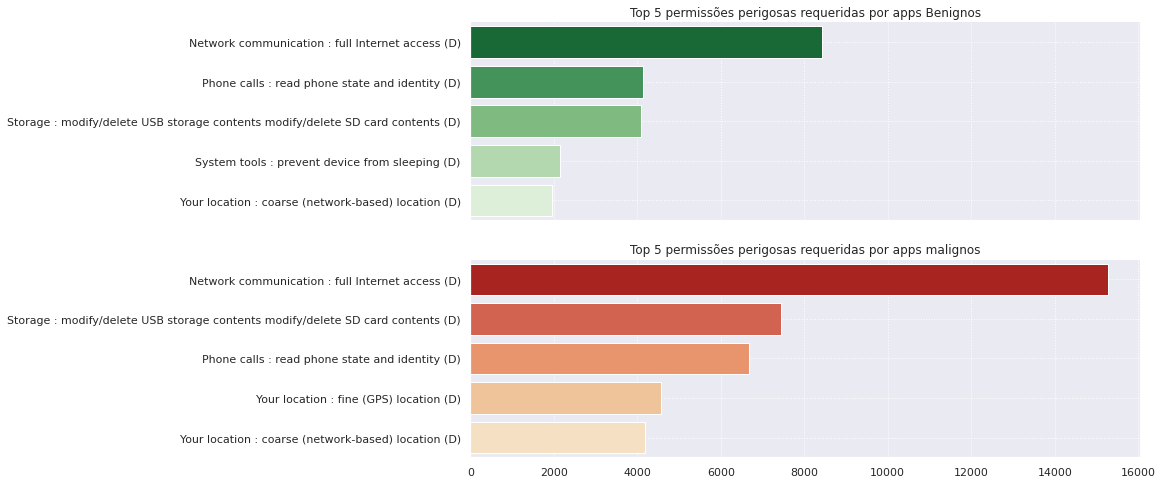

In [68]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=dangerous_benign.index, x=dangerous_benign.values, palette="Greens_r", ax=axs[0])
axs[0].set_title('Top 5 permissões perigosas requeridas por apps Benignos')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=dangerous_malware.index, x=dangerous_malware.values, palette='OrRd_r', ax=axs[1])
axs[1].set_title('Top 5 permissões perigosas requeridas por apps malignos')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

>Como podemos observar, a permissão perigosa *Acesso total a internet (Network communication : full internet access (D))* é tanto utilizada pela maioria dos aplicativos malignos quanto pela maioria dos aplicativos benignos. Isso indica que o simples fato da permissão ser perigosa não justifica o aplicativo ser maligno.

#### Top permissões seguras utilizadas por aplicativos benignos e malignos

In [69]:
safe_df['Class'] = explore_df['Class']
dangerous_df['Class'] = explore_df['Class']

safe_permissions_class_sum = safe_df.drop(columns=['Safe permissions count']).groupby('Class').sum().loc[:,]

safe_benign = safe_permissions_class_sum.loc[0].sort_values(ascending=False)[:5]
safe_malware = safe_permissions_class_sum.loc[1].sort_values(ascending=False)[:5]

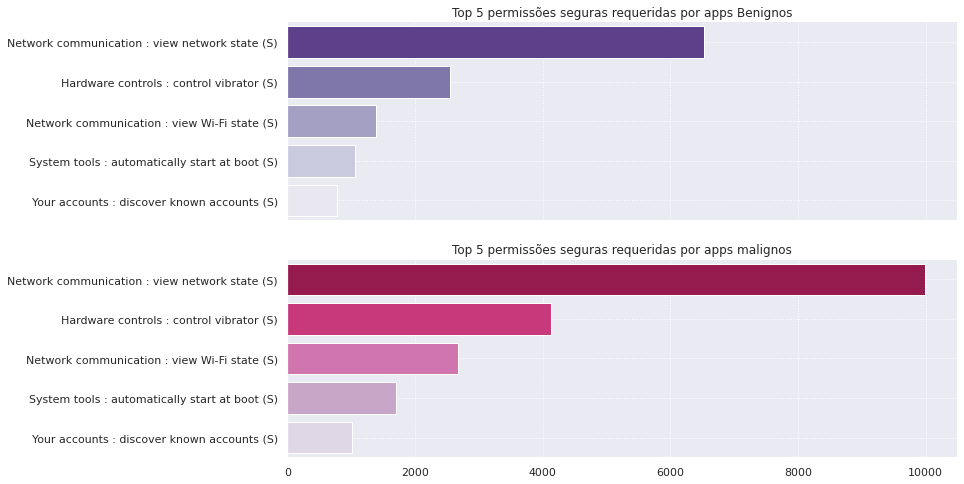

In [70]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=safe_benign.index, x=safe_benign.values, palette="Purples_r", ax=axs[0])
axs[0].set_title('Top 5 permissões seguras requeridas por apps Benignos')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=safe_malware.index, x=safe_malware.values, palette='PuRd_r', ax=axs[1])
axs[1].set_title('Top 5 permissões seguras requeridas por apps malignos')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

>Analisando o gráfico acima, podemos observar que as 5 permissões exibidas são as mais requeridas pelos aplicativos, tanto benignos quanto malignos. Então, conclui-se que sejam permissões fundamentais (requisitos mínimos) para que os aplicativos possam funcionar sem problemas.

### **Pagos e Gratuitos**

[Text(0, 0.5, 'Quantidade de aplicativos'),
 Text(0.5, 0, 'Classificação de preço')]

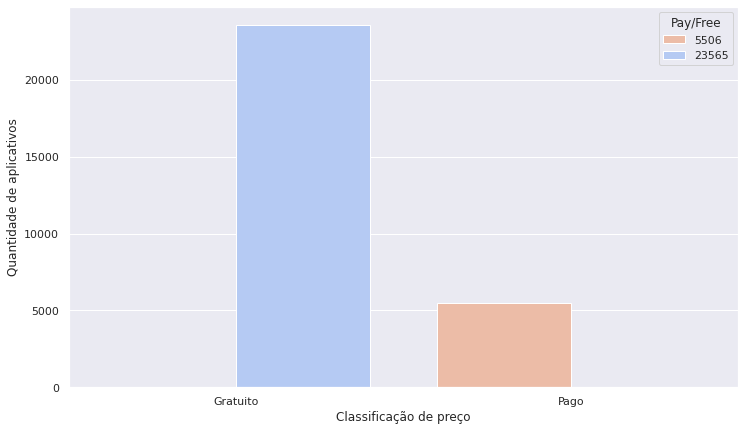

In [71]:
pay_free = explore_df['Pay/Free'].value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Gratuito","Pago"], y = pay_free, hue = pay_free, palette='coolwarm_r').set(xlabel='Classificação de preço', ylabel='Quantidade de aplicativos')

In [72]:
100 - (5506/23565)*100 

76.63483980479525

>Observando o gráfico, percebemos que 76,63% dos aplicativos maliciosos são gratuitos, é um resultado aceitável, pois os aplicativos malignos que são desenvolvidos com a finalidade de prejudicar o usuário ou o dispositivo do mesmo, devem ser gratuitos para serem de fácil acessibilidade.

>Porém, como mostrado no gráfico, ainda há 23,33% de aplicativos maliciosos que são pagos.

### **Categorias**

Quantidade de aplicativos Benignos e Malignos em cada categoria

In [73]:
apps_categories = explore_df.groupby('Class')['Category classification'].value_counts()
apps_categories

Class  Category classification
0      Entertainment              3628
       Games                      2091
       Tools                      1750
       Health                     1174
       Business                   1023
       Shopping                     31
1      Entertainment              6502
       Tools                      6017
       Games                      3412
       Health                     2163
       Business                    923
       Shopping                    357
Name: Category classification, dtype: int64

In [74]:
apps_benign = apps_categories.to_list()[0:6]
apps_benign_label = ['Entertainment', 'Games', 'Tools', 'Health', 'Business', 'Shopping']

apps_malign = apps_categories.to_list()[6:13]
apps_malign_label = ['Entertainment', 'Tools', 'Games', 'Health', 'Business', 'Shopping']

df_apps_benign = pd.DataFrame(apps_benign)
df_apps_malign = pd.DataFrame(apps_malign)

print('Apps Benignos: ', apps_benign)
print('Apps Malignos: ', apps_malign)

Apps Benignos:  [3628, 2091, 1750, 1174, 1023, 31]
Apps Malignos:  [6502, 6017, 3412, 2163, 923, 357]


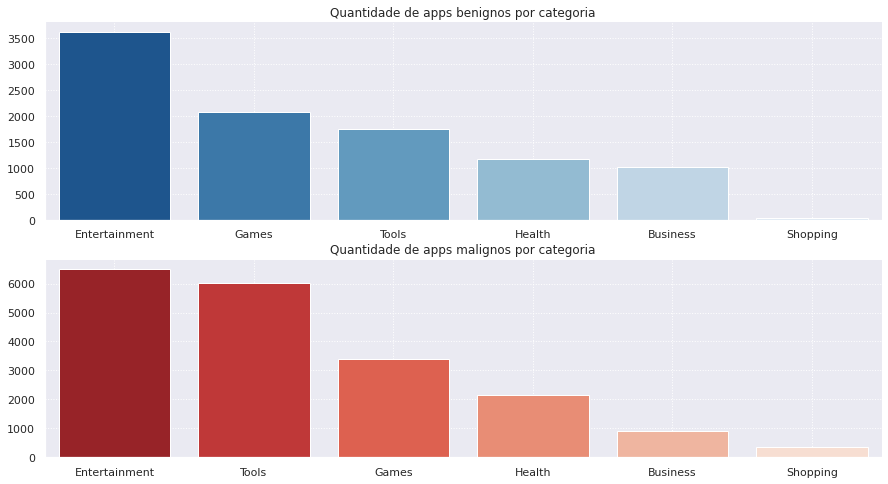

In [75]:
fig, axs = plt.subplots(figsize=(15, 8), ncols=1, nrows=2)

sns.barplot(y=apps_benign, x=apps_benign_label, palette="Blues_r", ax=axs[0])
axs[0].set_title('Quantidade de apps benignos por categoria')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=apps_malign, x=apps_malign_label, palette='Reds_r', ax=axs[1])
axs[1].set_title('Quantidade de apps malignos por categoria')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

>Analisando o gráfico, podemos observar que os aplicativos maliciosos estão mais distribuídos nas categorias de entretenimento e ferramentas, seguidas dos jogos.

# **Seleção de características / Feature Selection**

>Nessa seção, estudaremos a importância das *features* para o nosso conjunto de dados. Escolher as "melhores" *features* é uma etapa muito importante do processo de Machine Learning, pois são esses dados que elevam a capacidade de precisão do modelo.
>>Um bom conjunto de dados é o que define se um modelo terá um desempenho aceitável ou não. Aqui usaremos métodos para selecionar as melhores *features* e analisaremos ainda nesse notebook, a comparação do desempenho dos modelos na detecção dos *malwares* em dois casos:
utilizando como base de treino todas as *features* e com as melhores 

* **1° caso** - utilizaremos todas as *features* como base de treino para os modelos.
* **2° caso** - utilizaremos as *features* mais relevantes selecionadas para servir como base de treino para os modelos.

selecionadas.

### Separando variáveis em alvo e preditoras

A primeira etapa, é separarmos as variáveis em alvo e preditoras.
>As variáveis alvo são aquelas que contém o gabarito da classificação dos aplicativos (Benignos ou Malignos). Serão essas variáveis que o modelo quer detectar e comparar seu resultado, a fim de analisar sua taxa de precisão em sua detecção. As variáveis alvos, nesse caso de classificação< precisam ser classificadas em 0 e 1, para facilitar os cálculos dos algoritmos de classificação.

>As variáveis preditoras são todas aquelas que fornecemos ao treino do modelo. Ele irá fazer seus cálculos em cima desses dados fornecidos, e tentará fazer uma predição da classificação desses aplicativos através das variáveis preditoras. **OBS:** É muito importante que as variáveis preditoras sejam apenas números (floats ou inteiros) para que não haja nenhum erro ou falha nos cálculos dos algoritmos.

In [76]:
# Variável alvo
y = explore_df['Class']
# Variáveis preditoras
x = explore_df.drop(columns=['App', 'Class', 'Category', 'Category classification', 'Price', 'Pay/Free'])

### **Select K-Best***

>**Select K-Best** é um método que calcula e nos retorna as *n features* mais relevantes que auxiliarão os modelos a predizerem a classe dos aplicativos.
>>Nessa seção, analisaremos as 20 *features* que o *KBest* selecionar para nós.

In [77]:
from sklearn.feature_selection import SelectKBest, f_regression

In [78]:
kbest = SelectKBest(f_regression, k=20)
kbest.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=20, score_func=<function f_regression at 0x7f703df5ad40>)

In [79]:
col_names = kbest.get_support()
kbest_df = x.loc[:, col_names]
kbest_df['Class'] = y
kbest_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Safe permissions count,Total count permissions,Hardware controls : control vibrator (S),Network communication : full Internet access (D),Network communication : view network state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : automatically start at boot (S),System tools : modify global system settings (D),System tools : prevent device from sleeping (D),System tools : retrieve running applications (D),System tools : set wallpaper (S),Your accounts : discover known accounts (S),Your location : access extra location provider commands (S),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your personal information : read Browser's history and bookmarks (D),Your personal information : read sensitive log data (D),Your personal information : write Browser's history and bookmarks (D),Class
8,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,4,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
10,2,9,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Matriz de correlação das *features*

>A matriz de correlação nos ajuda a entender e otimizar a visualização da correlação entre cada *feature*.
>>As *features* podem ser diretas ou inversamentes proporcionais à outras. Quanto maior for a correlação da variável preditora em relação à variável alvo, maior será o grau de relevância da variável preditora para o modelo.

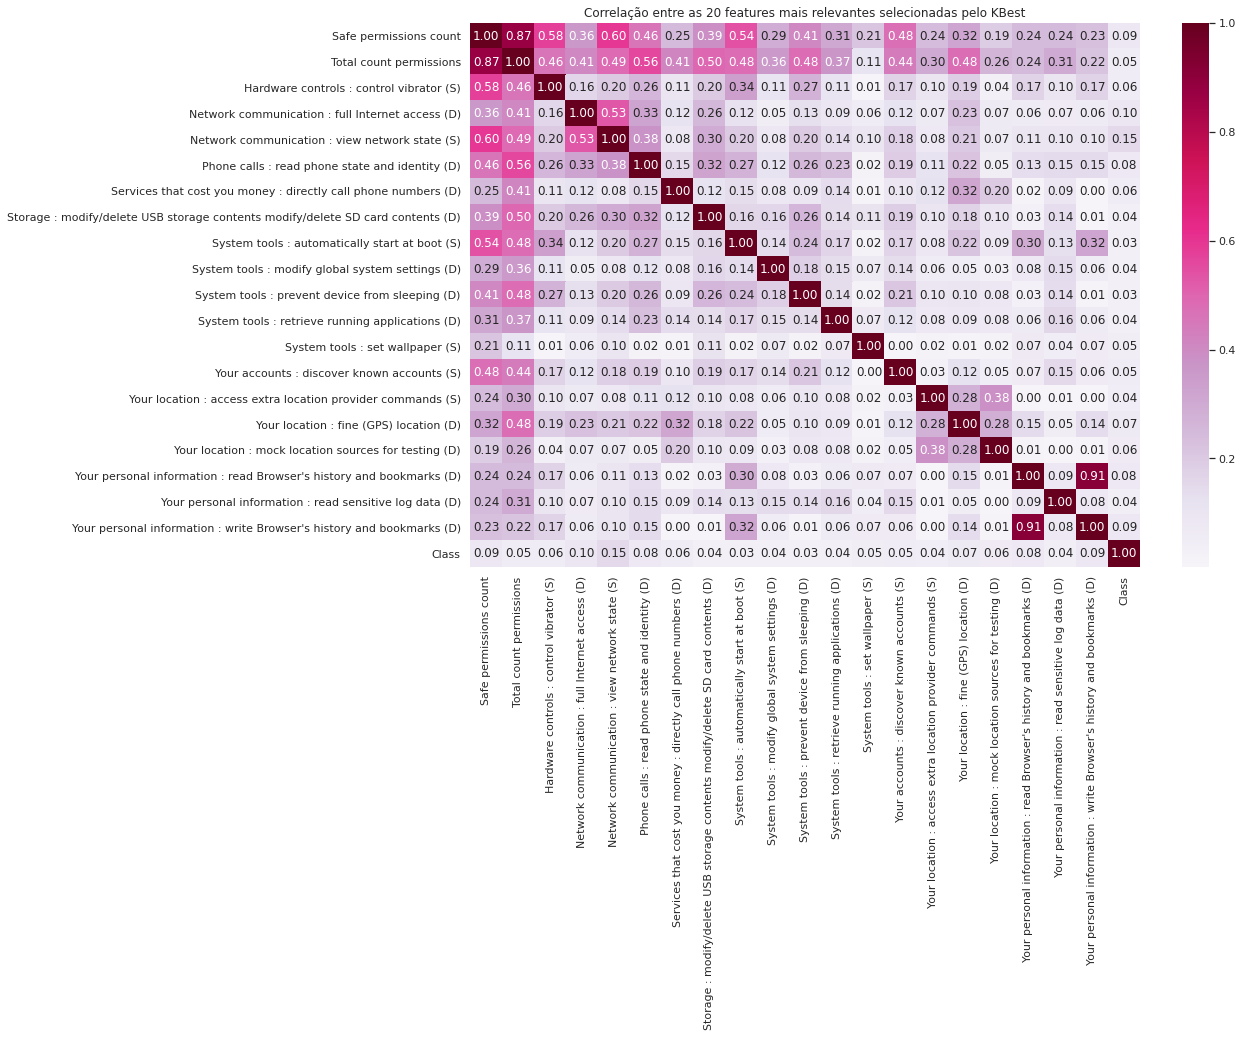

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(kbest_df.corr()),
            annot=True,
            fmt='.2f',
            cmap='PuRd')
plt.title('Correlação entre as 20 features mais relevantes selecionadas pelo KBest')
plt.show()

>Analisando a matriz de correlação, podemos observar que as features selecionadas possuem uma porcentagem baixa de dependência com a variável alvo. Isso quer dizer que as features podem não ser o suficientes para auxiliar o modelo a alcançar um resultado satisfatório.
>>Outro ponto a ser analisado aqui, são as *features* da contagem de permissões criadas, elas possuem uma boa correlação com as outras *features*. Isso quer dizer que nosso processo de *Feature Engineering* está sendo relevante para o problema até o momento, elas irão ajudar o modelo na etapa dos cálculos.

# **Separação de variáveis de treino, teste e validação**

>Nessa etapa, iremos separar os dados em conjunto de dados de treino, teste e validação. Iremos separar 50% dos dados para treino, 30% para teste e 20% para validação. Separamos os dados de forma estratificada para que os aplicativos benignos e malignos sejam distribuídos igualmente em cada repartição.

In [81]:
from sklearn.model_selection import train_test_split

**OBS:** Vamos classificar as *features 'Category classification* e *'Pay/Free'* para ajudar o modelo em seus cálculos .

In [82]:
# Classificando categorias
explore_df['Category classification'].replace('Games',0, inplace=True)
explore_df['Category classification'].replace('Entertainment',1, inplace=True)
explore_df['Category classification'].replace('Health',2, inplace=True)
explore_df['Category classification'].replace('Business',3, inplace=True)
explore_df['Category classification'].replace('Tools',4, inplace=True)
explore_df['Category classification'].replace('Shopping',5, inplace=True)

# Classificando pay/free
explore_df['Pay/Free'].replace('Free',0, inplace=True)
explore_df['Pay/Free'].replace('Pay',1, inplace=True)

Separando conjunto de dados em treino/teste e validação

In [83]:
train, validation = train_test_split(explore_df, test_size = 0.2, stratify = y)

Treino e teste

In [84]:
x_2 = train.drop(columns=['App', 'Class', 'Category', 'Price'])
y_2 = train['Class']
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.375, stratify = y_2)

Validação

In [85]:
x_validation = validation.drop(columns=['App', 'Class', 'Category', 'Price'])
y_validation = validation['Class']

***Pronto!*** O conjunto de dados está separado em treino, teste e validação.
>Porém há um ponto muito importante nisso tudo, que é o balanceamento do dataset. O balanceamento do conjunto de dados pode ser fatal para o modelo não viciar em predizer a classe majoritária.

Como sabemos, o conjunto de dados está desbalanceado, com uma proporção de aproximadamente 2 aplicativos Malignos para 1 Benigno, e isso poderá impactar nos resultados do modelo.
>Uma alternativa é balancearmos o conjunto de dados de treino para que o modelo treine com uma quantidade de dados razoável e balanceados para reduzir as chances de dar *Overfitting* em predizer a classe majoritária, no caso os malignos.
>Após treinarmos os modelos com os dados de treino balanceados, testamos e validamos com o conjunto de dados desbalanceado para aproximar as detecções de um caso real.

### **Balanceamento dos dados de treino**

[Text(0, 0.5, 'Quantidade de aplicativos'),
 Text(0.5, 0, 'Classificação dos aplicativos')]

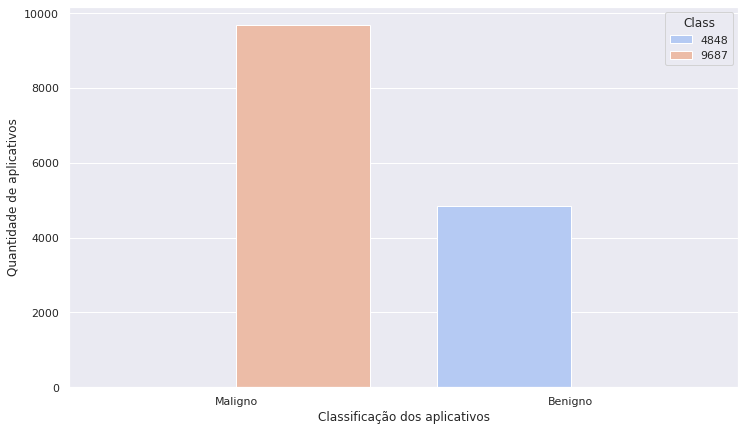

In [86]:
values_train = y_train.value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Maligno","Benigno"], y = values_train, hue = values_train, palette = "coolwarm").set(xlabel='Classificação dos aplicativos', ylabel='Quantidade de aplicativos')

In [87]:
balance_train = y_train.value_counts()[1] / y_train.value_counts()[0]
print('Balanceamento  --->  Benigno',balance_train,'1 Maligno')

Balanceamento  --->  Benigno 1.9981435643564356 1 Maligno


**Dataset desbalanceado**


> Com um dataset desbalanceado como esse (Benigno 2 : 1 Maligno), devemos utilizar métodos para balancear a classificação binária dos aplicativos na hora de separar o conjunto de dados em treino. Nesse caso usaremos o método Random Under Sampler para criar um subset que selecionará, aleatoriamente, pequenas fatias dos dados da classe marjoritária, no caso os malignos, e irá descartá-los, reduzindo a quantidade da maior classe, balanceando o dataset.

>Após treinar os modelos com os dados balanceados, testamos e validamos com dados desbalanceados para aproximar a previsão de um caso real.

In [88]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

resampled_y = pd.DataFrame(y_resampled)
resampled_x = pd.DataFrame(x_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [89]:
var = y_train.value_counts()[1] - resampled_y.value_counts()[1]
print('Benignos retirados dos dados de treino:', var)

Benignos retirados dos dados de treino: 1    4839
dtype: int64


***Pronto!*** O conjunto de dados de treino está balanceado.

# **Seleção de Modelos / Model Selection**

In [90]:
from sklearn.metrics import plot_confusion_matrix

>Essa é a etapa onde selecionaremos nossos algoritmos de classificação e criaremos modelos a partir deles que sejam capaz de prever os aplicativo malignos.

>>O algoritmo padrão solcitado será o *Random Forest Classifier*. Os outros serão selecionados de modo que atendam o problema proposto.

### **Treino Balanceado e Desbalanceado**

**OBS:** Iremos comparar o desempenho dos modelos ao serem treinados com dados desbalanceados e balanceados.

#### **RandomForestClassifier**

In [91]:
from sklearn.ensemble import RandomForestClassifier

unbalanced_RFC = RandomForestClassifier()
balanced_RFC = RandomForestClassifier()

# treino desbalanceado
unbalanced_RFC.fit(x_train, y_train)
# treino balanceado
balanced_RFC.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Comparação de Teste Balanceado e Desbalanceado

Teste Desbalanceado e Balanceado

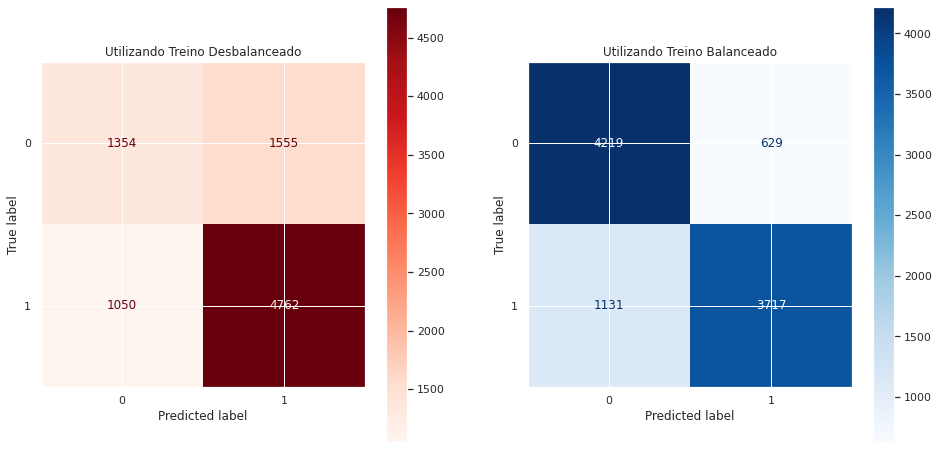

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.set(title='Utilizando Treino Desbalanceado')
ax2.set(title='Utilizando Treino Balanceado')
plot_confusion_matrix(unbalanced_RFC, x_test, y_test,ax=ax1, cmap = 'Reds', values_format='d')
plot_confusion_matrix(balanced_RFC, resampled_x, resampled_y, ax=ax2, cmap='Blues', values_format='d')

In [93]:
y_train.value_counts()

1    9687
0    4848
Name: Class, dtype: int64

In [94]:
resampled_y.value_counts()

1    4848
0    4848
dtype: int64

Validação Desbalanceada e Balanceada

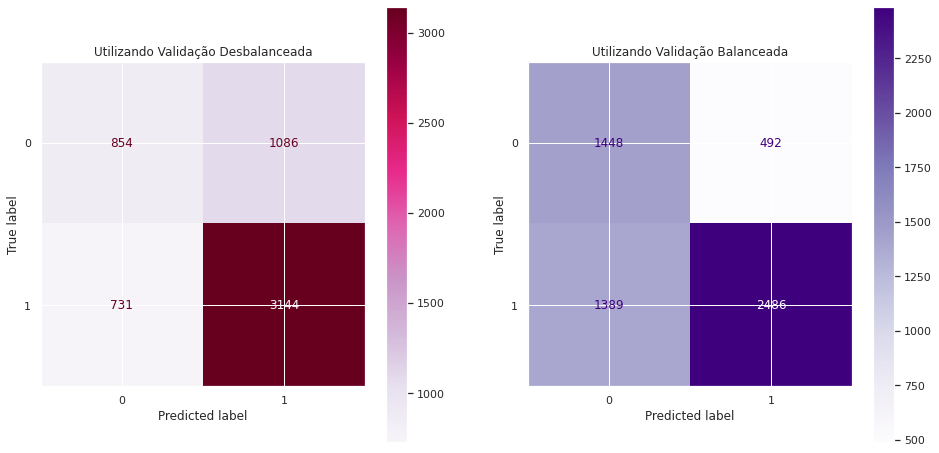

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set_title('Utilizando Validação Desbalanceada')
ax2.set_title('Utilizando Validação Balanceada')
plot_confusion_matrix(unbalanced_RFC, x_validation, y_validation, cmap='PuRd', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_RFC, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax2)

In [96]:
y_validation.value_counts()

1    3875
0    1940
Name: Class, dtype: int64

#### **Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier

unbalanced_DT = DecisionTreeClassifier()
balanced_DT = DecisionTreeClassifier()

# treino desbalanceado
unbalanced_DT.fit(x_train, y_train)
# treino balanceado
balanced_DT.fit(resampled_x, resampled_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Teste Desbalanceado e Balanceado

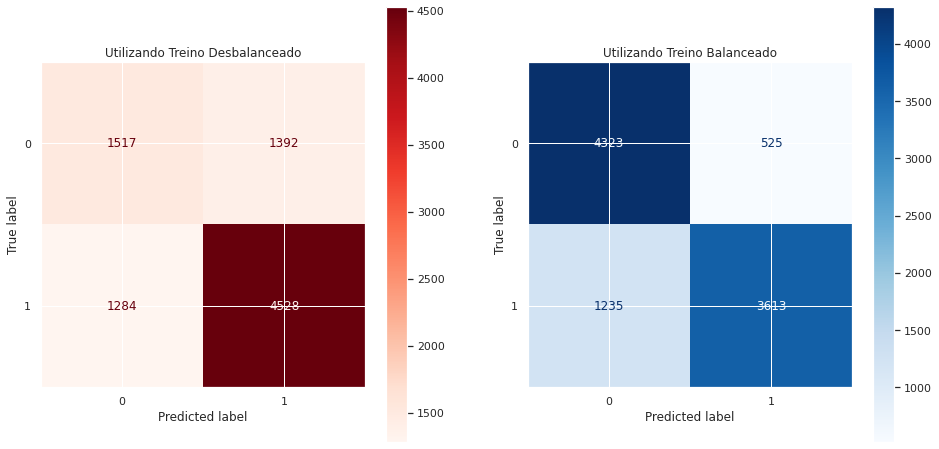

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_DT, x_test, y_test, cmap='Reds', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_DT, resampled_x, resampled_y, cmap='Blues', values_format='d', ax=ax2)

[Text(0, 0.5, ''), Text(0.5, 0, '')]

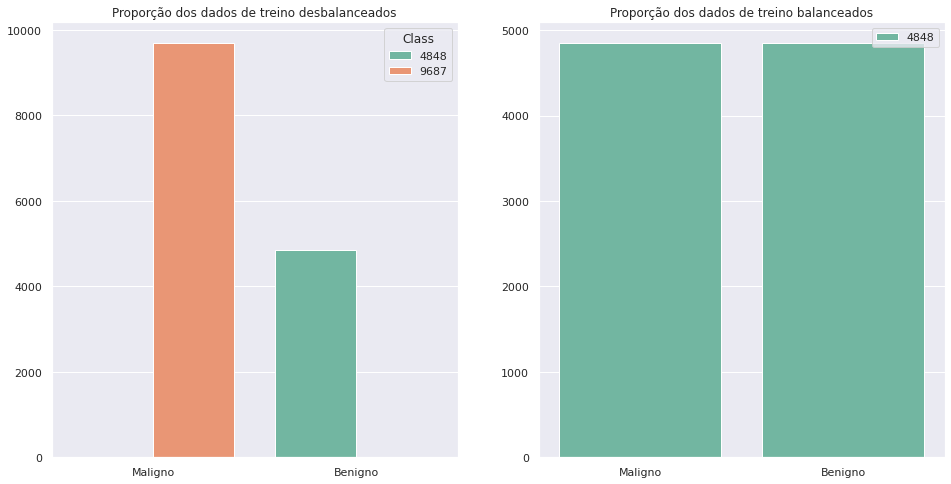

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Proporção dos dados de treino desbalanceados')
ax2.set_title('Proporção dos dados de treino balanceados')

# Gráficos
unbalanced_class_DT = y_train.value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Maligno","Benigno"], y = unbalanced_class_DT, hue = unbalanced_class_DT, ax=ax1, palette = "Set2").set(xlabel='', ylabel='')

balanced_class_DT = resampled_y.value_counts()
sns.set(rc={"figure.figsize":(10, 7)})
sns.barplot(x = ["Maligno","Benigno"], y = balanced_class_DT, hue = balanced_class_DT, ax=ax2, palette = "Set2").set(xlabel='', ylabel='')

Validação Desbalanceada e Balanceada

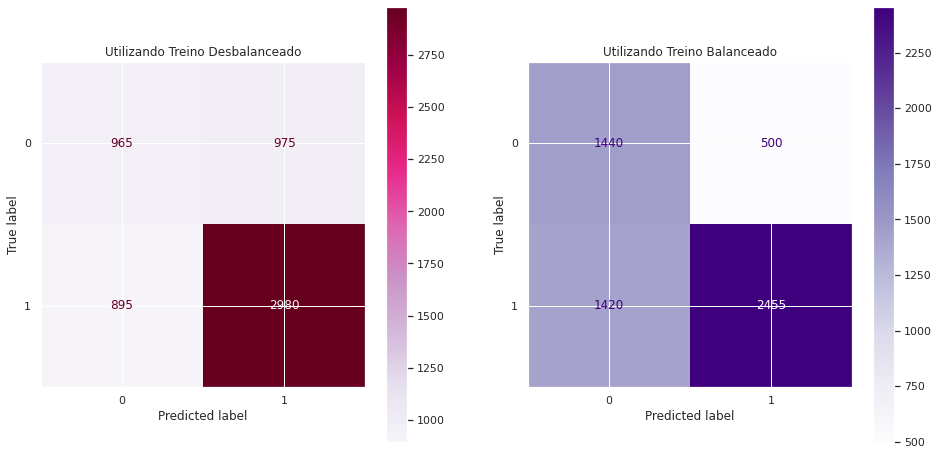

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_DT, x_validation, y_validation, cmap='PuRd', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_DT, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax2)

#### **Support Vector Machine (SVM)**

In [101]:
from sklearn.svm import SVC

unbalanced_SVC = SVC()
balanced_SVC = SVC()

# treino desbalanceado
unbalanced_SVC.fit(x_train, y_train)
# treino balanceado
balanced_SVC.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Teste Desbalanceado e Balanceado

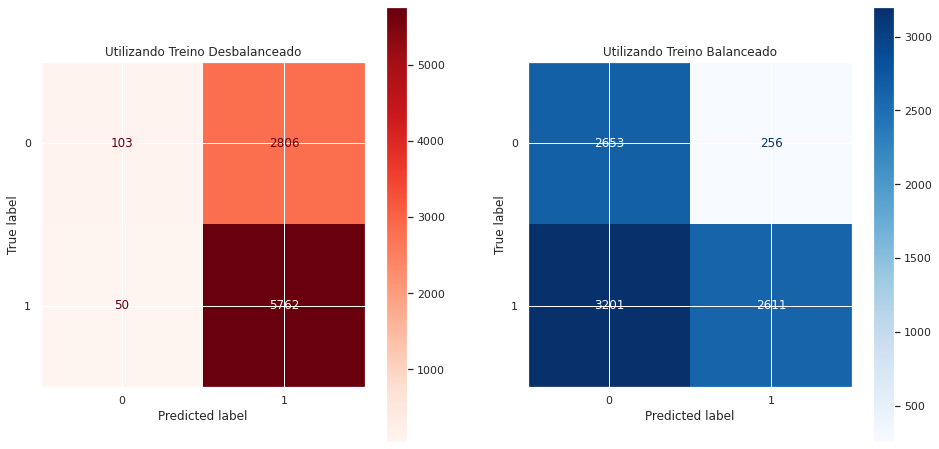

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_SVC, x_test, y_test, cmap='Reds', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_SVC, x_test, y_test, cmap='Blues', values_format='d', ax=ax2)

Validação Desbalanceada e Balanceada

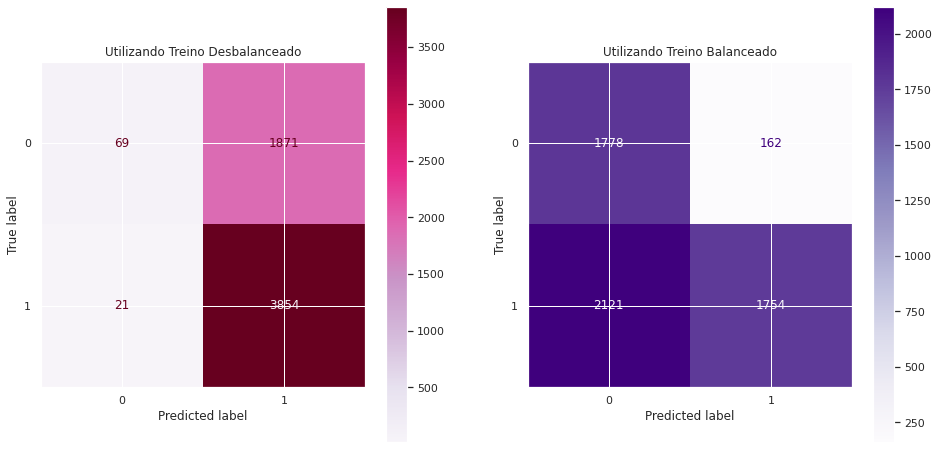

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_SVC, x_validation, y_validation, cmap='PuRd', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_SVC, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax2)

#### **LighGBM Classifier**

In [104]:
from lightgbm import LGBMClassifier

unbalanced_LGBM = LGBMClassifier()
balanced_LGBM = LGBMClassifier()

# treino desbalanceado
unbalanced_LGBM.fit(x_train, y_train)
# treino balanceado
balanced_LGBM.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Teste Desbalanceado e Balanceado

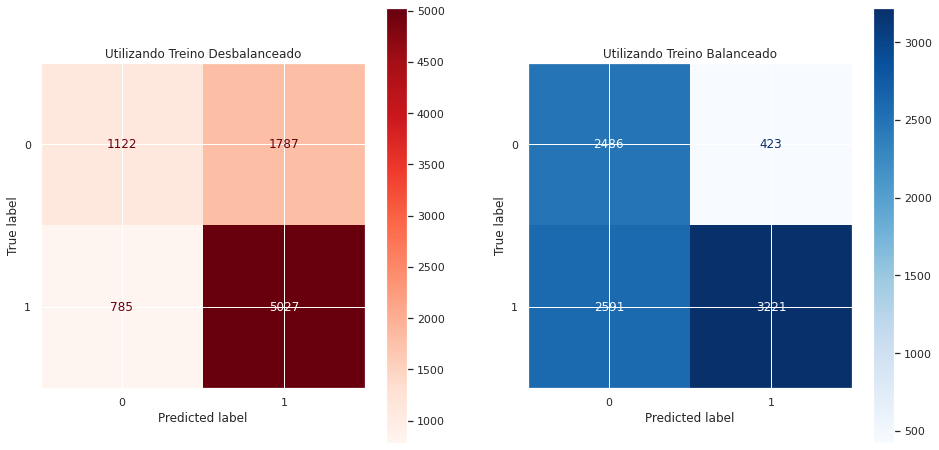

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_LGBM, x_test, y_test, cmap='Reds', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_LGBM, x_test, y_test, cmap='Blues', values_format='d', ax=ax2)

Validação Desbalanceada e Balanceada

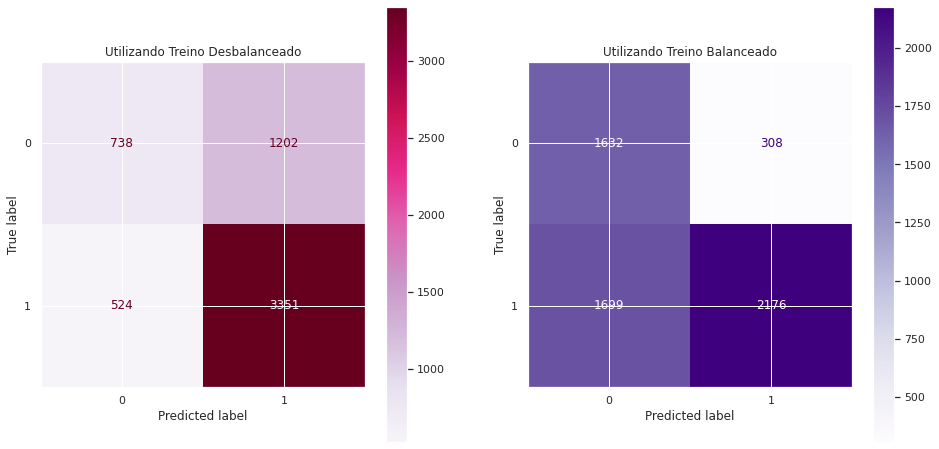

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Títulos
ax1.set_title('Utilizando Treino Desbalanceado')
ax2.set_title('Utilizando Treino Balanceado')

# Matrizes de confusões
plot_confusion_matrix(unbalanced_LGBM, x_validation, y_validation, cmap='PuRd', values_format='d', ax=ax1)
plot_confusion_matrix(balanced_LGBM, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax2)

# **Otimização de modelos / Model Boosting**

>Essa é a seção onde iremos otimizar nossos modelos, combinando e encontrando a melhor combinação de hiperparâmetros. Os modelos melhorados serão treinados com dados balanceados.

## Análise manual

>Essa é a seção onde escolho manualmente os hiperparâmetros dos modelos, a fim de econtrar a melhor combinação que performe em um desempenho melhor.

>**OBS:**
*   balanced_RFC --> é um modelo de RandomForestClassifier que foi treinado com os dados balanceados.
*   manual_RFC --> é um modelo qde RandomForestClassifier que foi melhorado combinando alguns hiperparâmetros manualmente.

>A mesma coisa acontecerá para os outros modelos

### **RandomForestClassifier**

In [219]:
manual_RFC = RandomForestClassifier(n_estimators=140, min_samples_leaf=1, min_samples_split=5)
manual_RFC.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

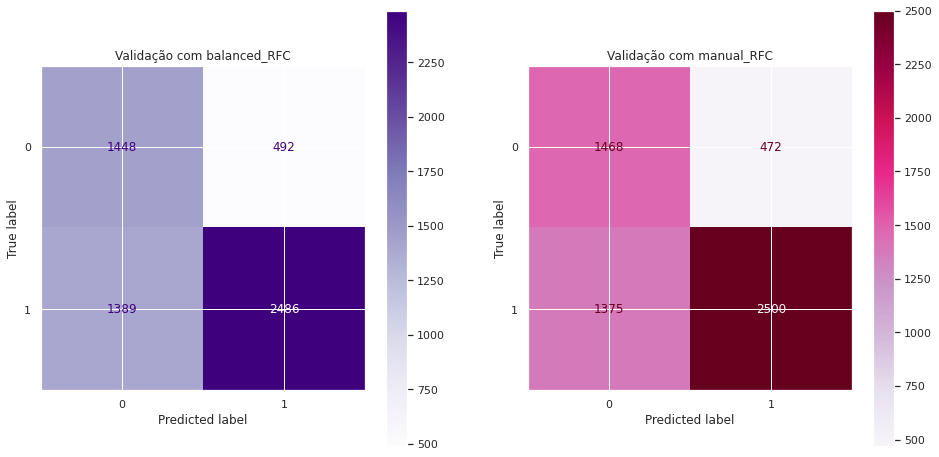

In [220]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Validação com balanced_RFC')
ax2.set_title('Validação com manual_RFC')
#Matrizes de confusões
plot_confusion_matrix(balanced_RFC, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax1)
plot_confusion_matrix(manual_RFC, x_validation, y_validation, cmap='PuRd',values_format='d' ,ax=ax2)

#### Teste

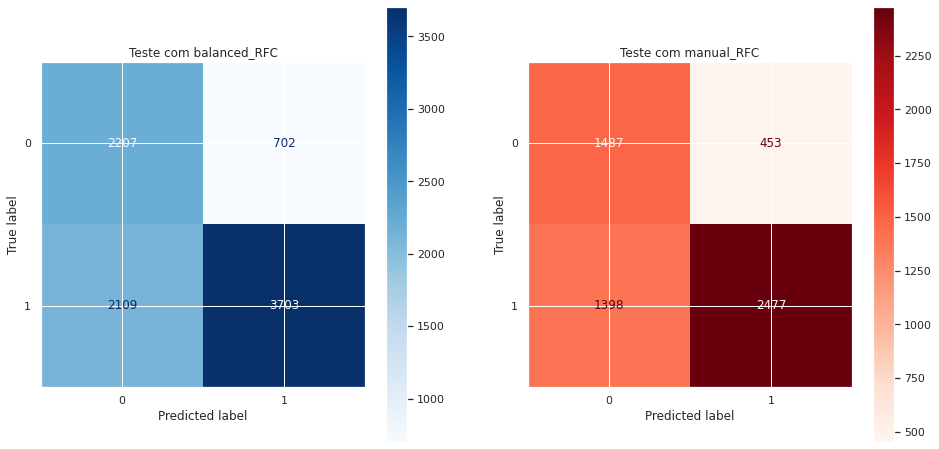

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Teste com balanced_RFC')
ax2.set_title('Teste com manual_RFC')
# Matrizes de confusões
plot_confusion_matrix(balanced_RFC, x_test, y_test, cmap='Blues', values_format='d', ax=ax1)
plot_confusion_matrix(manual_RFC, x_validation, y_validation, cmap='Reds', values_format='d', ax=ax2)

#### Validação

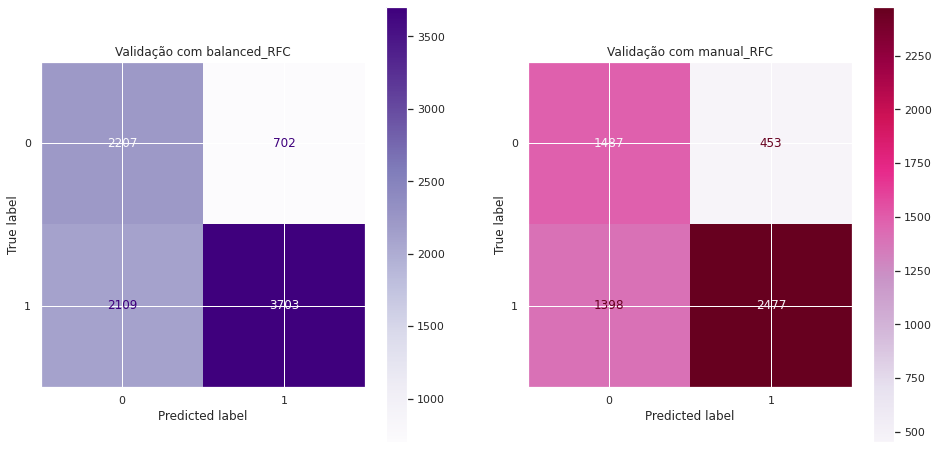

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Validação com balanced_RFC')
ax2.set_title('Validação com manual_RFC')
# Matrizes de confusões
plot_confusion_matrix(balanced_RFC, x_test, y_test, cmap='Purples', values_format='d', ax=ax1)
plot_confusion_matrix(manual_RFC, x_validation, y_validation, cmap='PuRd', values_format='d', ax=ax2)

### **DecisionTree**

In [111]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
manual_DT = DecisionTreeClassifier(max_leaf_nodes=3)
manual_DT.fit(resampled_x, resampled_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

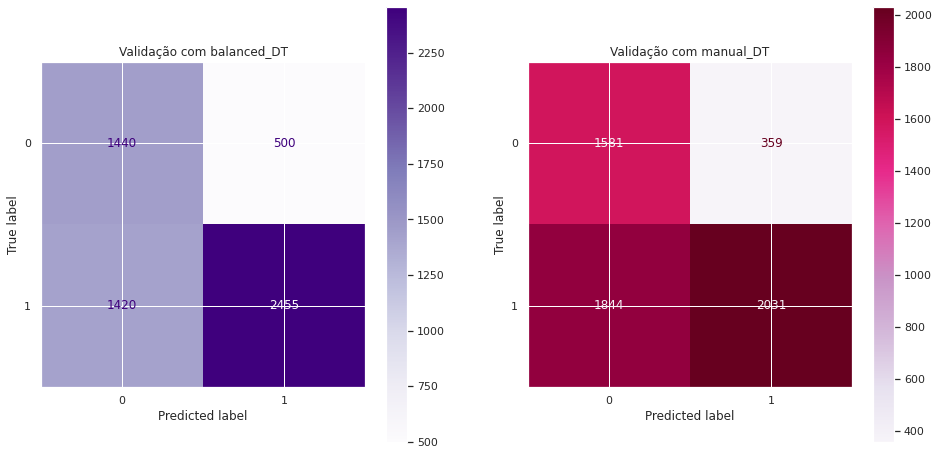

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Validação com balanced_DT')
ax2.set_title('Validação com manual_DT')
#Matrizes de confusões
plot_confusion_matrix(balanced_DT, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax1)
plot_confusion_matrix(manual_DT, x_validation, y_validation, cmap='PuRd',values_format='d' ,ax=ax2)

### **Support Vector Machine (SVM)**

In [114]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
manual_SVC = SVC(kernel='linear')
manual_SVC.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

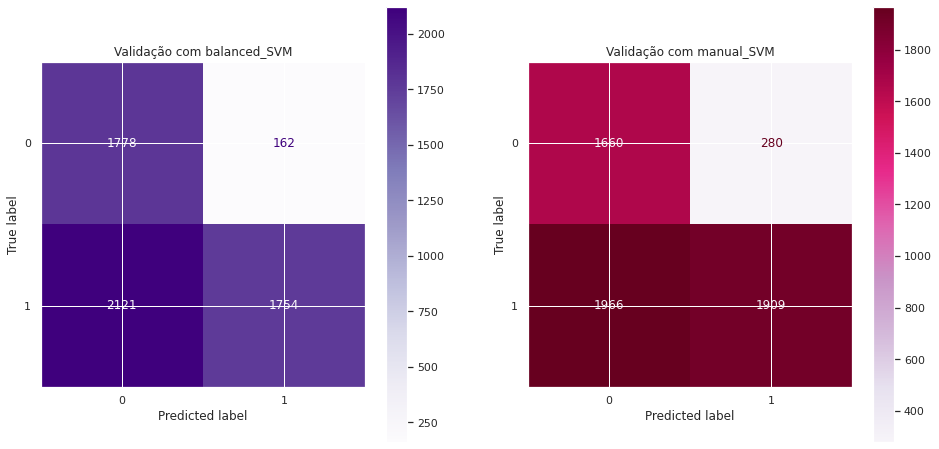

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Validação com balanced_SVM')
ax2.set_title('Validação com manual_SVM')
#Matrizes de confusões
plot_confusion_matrix(balanced_SVC, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax1)
plot_confusion_matrix(manual_SVC, x_validation, y_validation, cmap='PuRd',values_format='d' ,ax=ax2)

### **LightGBMClassifier**

In [117]:
LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [191]:
manual_LGBM = LGBMClassifier(n_estimators=102, num_leaves=45, min_child_samples=22)
manual_LGBM.fit(resampled_x, resampled_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=22, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=102, n_jobs=-1, num_leaves=45, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

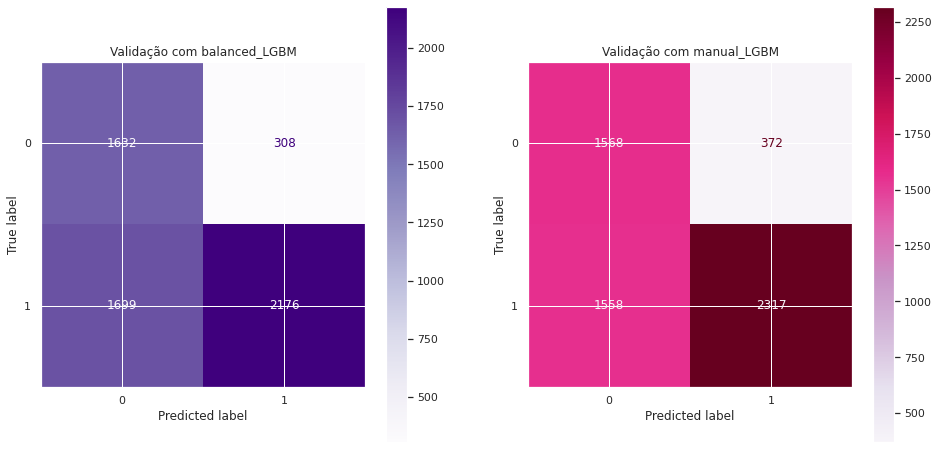

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# Títulos
ax1.set_title('Validação com balanced_LGBM')
ax2.set_title('Validação com manual_LGBM')
#Matrizes de confusões
plot_confusion_matrix(balanced_LGBM, x_validation, y_validation, cmap='Purples', values_format='d', ax=ax1)
plot_confusion_matrix(manual_LGBM, x_validation, y_validation, cmap='PuRd',values_format='d' ,ax=ax2)

# Métricas

>Seção onde serão comparadas as métricas de desempenho dos modelos avaliados. Avaliaremos algumas métricas, mas a que daremos ênfase é a Roc_Auc por ser mais adequada para comparar o desempenho de modelos de Machine Learning.

>**OBS:** O modelo é testado nos dados de teste com a validação cruzada, porém ao ser testado em dados de validação, utilizaremos apenas um predict do modelo para que se aproxime do caso real, onde só sera efetuada uma detecção.

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Teste/Validação Balanceados e Desbalanceados

#### **RandomForestClassifier**

##### Teste

In [221]:
# teste desbalanceado
accuracy_unbalanced_RFC = cross_val_score(unbalanced_RFC, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_unbalanced_RFC = cross_val_score(unbalanced_RFC, x_test, y_test, cv=5, scoring='precision').mean()
recall_unbalanced_RFC = cross_val_score(unbalanced_RFC, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_unbalanced_RFC = cross_val_score(unbalanced_RFC, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_unbalanced_RFC = cross_val_score(unbalanced_RFC, x_test, y_test, cv=5, scoring='roc_auc').mean()

# teste balanceado
accuracy_balanced_RFC = cross_val_score(balanced_RFC, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_balanced_RFC = cross_val_score(balanced_RFC, x_test, y_test, cv=5, scoring='precision').mean()
recall_balanced_RFC = cross_val_score(balanced_RFC, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_balanced_RFC = cross_val_score(balanced_RFC, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_balanced_RFC = cross_val_score(balanced_RFC, x_test, y_test, cv=5, scoring='roc_auc').mean()

# exibir os resultados na tela
print('***** Teste utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_RFC*100,'%')
print('Precisão:', precision_unbalanced_RFC*100,'%')
print('Recall:', recall_unbalanced_RFC*100,'%')
print('F1-Score:', f1_score_unbalanced_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_RFC*100,'%')

print('\n***** Teste utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_RFC*100,'%')
print('Precisão:', precision_balanced_RFC*100,'%')
print('Recall:', recall_balanced_RFC*100,'%')
print('F1-Score:', f1_score_balanced_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_RFC*100,'%')

***** Teste utilizando treino desbalanceado *****

Acurácia: 68.43253331931338 %
Precisão: 73.34272112728577 %
Recall: 81.4694177767451 %
F1-Score: 77.67695734736245 %
Roc_Auc: 74.72966594399307 %

***** Teste utilizando treino balanceado *****

Acurácia: 68.03121631923452 %
Precisão: 73.42368158722319 %
Recall: 81.64147561872598 %
F1-Score: 77.40278505918864 %
Roc_Auc: 74.85820431497352 %


##### Validação

In [222]:
# Previsões
proba_unbalanced_RFC = unbalanced_RFC.predict(x_validation)
proba_balanced_RFC = balanced_RFC.predict(x_validation)

# validação desbalanceada
accuracy_unbalanced_val_RFC = accuracy_score(proba_unbalanced_RFC, y_validation)
precision_unbalanced_val_RFC = precision_score(proba_unbalanced_RFC, y_validation)
recall_unbalanced_val_RFC = recall_score(proba_unbalanced_RFC, y_validation)
f1_score_unbalanced_val_RFC = f1_score(proba_unbalanced_RFC, y_validation)
roc_auc_score_unbalanced_val_RFC = roc_auc_score(proba_unbalanced_RFC, y_validation)

# validação balanceada
accuracy_balanced_val_RFC = accuracy_score(proba_balanced_RFC, y_validation)
precision_balanced_val_RFC = precision_score(proba_balanced_RFC, y_validation)
recall_balanced_val_RFC = recall_score(proba_balanced_RFC, y_validation)
f1_score_balanced_val_RFC = f1_score(proba_balanced_RFC, y_validation)
roc_auc_score_balanced_val_RFC = roc_auc_score(proba_balanced_RFC, y_validation)

# exibir os resultados na tela
print('***** Teste utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_val_RFC*100,'%')
print('Precisão:', precision_unbalanced_val_RFC*100,'%')
print('Recall:', recall_unbalanced_val_RFC*100,'%')
print('F1-Score:', f1_score_unbalanced_val_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_val_RFC*100,'%')

print('\n***** Teste utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_val_RFC*100,'%')
print('Precisão:', precision_balanced_val_RFC*100,'%')
print('Recall:', recall_balanced_val_RFC*100,'%')
print('F1-Score:', f1_score_balanced_val_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_RFC*100,'%')

***** Teste utilizando treino desbalanceado *****

Acurácia: 68.75322441960448 %
Precisão: 81.13548387096773 %
Recall: 74.32624113475177 %
F1-Score: 77.5817396668723 %
Roc_Auc: 64.10318365885853 %

***** Teste utilizando treino balanceado *****

Acurácia: 67.65262252794497 %
Precisão: 64.15483870967742 %
Recall: 83.47884486232371 %
F1-Score: 72.5521669341894 %
Roc_Auc: 67.2593378347572 %


Podemos observar a queda significante na precisão do modelo de RandomForestClassifier em detectar *malwares* com dados desbalanceados para dados balanceados.

#### **Decision Tree**

##### Teste

In [123]:
# teste desbalanceado
accuracy_unbalanced_DT = cross_val_score(unbalanced_DT, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_unbalanced_DT = cross_val_score(unbalanced_DT, x_test, y_test, cv=5, scoring='precision').mean()
recall_unbalanced_DT = cross_val_score(unbalanced_DT, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_unbalanced_DT = cross_val_score(unbalanced_DT, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_unbalanced_DT = cross_val_score(unbalanced_DT, x_test, y_test, cv=5, scoring='roc_auc').mean()

# teste balanceado
accuracy_balanced_DT = cross_val_score(balanced_DT, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_balanced_DT= cross_val_score(balanced_DT, x_test, y_test, cv=5, scoring='precision').mean()
recall_balanced_DT = cross_val_score(balanced_DT, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_balanced_DT = cross_val_score(balanced_DT, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_balanced_DT = cross_val_score(balanced_DT, x_test, y_test, cv=5, scoring='roc_auc').mean()

# exibir os resultados na tela
print('***** Teste utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_DT*100,'%')
print('Precisão:', precision_unbalanced_DT*100,'%')
print('Recall:', recall_unbalanced_DT*100,'%')
print('F1-Score:', f1_score_unbalanced_DT*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_DT*100,'%')

print('\n***** Teste utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_DT*100,'%')
print('Precisão:', precision_balanced_DT*100,'%')
print('Recall:', recall_balanced_DT*100,'%')
print('F1-Score:', f1_score_balanced_DT*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_DT*100,'%')

***** Teste utilizando treino desbalanceado *****

Acurácia: 66.78132146894141 %
Precisão: 74.28917539372047 %
Recall: 76.6346456949281 %
F1-Score: 75.29812665056544 %
Roc_Auc: 69.22654986389051 %

***** Teste utilizando treino balanceado *****

Acurácia: 66.5291133250966 %
Precisão: 74.20134767110675 %
Recall: 76.51428216242935 %
F1-Score: 75.31513173860857 %
Roc_Auc: 69.24571124914156 %


##### Validação

In [204]:
# Previsões
proba_unbalanced_DT = unbalanced_DT.predict(x_validation)
proba_balanced_DT = balanced_DT.predict(x_validation)

# validação desbalanceada
accuracy_unbalanced_val_DT = accuracy_score(proba_unbalanced_DT, y_validation)
precision_unbalanced_val_DT = precision_score(proba_unbalanced_DT, y_validation)
recall_unbalanced_val_DT = recall_score(proba_unbalanced_DT, y_validation)
f1_score_unbalanced_val_DT = f1_score(proba_unbalanced_DT, y_validation)
roc_auc_score_unbalanced_val_DT = roc_auc_score(proba_unbalanced_DT, y_validation)

# validação balanceada
accuracy_balanced_val_DT = accuracy_score(proba_balanced_DT, y_validation)
precision_balanced_val_DT = precision_score(proba_balanced_DT, y_validation)
recall_balanced_val_DT = recall_score(proba_balanced_DT, y_validation)
f1_score_balanced_val_DT = f1_score(proba_balanced_DT, y_validation)
roc_auc_score_balanced_val_DT = roc_auc_score(proba_balanced_DT, y_validation)

# exibir os resultados na tela
print('***** Validação utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_val_DT*100,'%')
print('Precisão:', precision_unbalanced_val_DT*100,'%')
print('Recall:', recall_unbalanced_val_DT*100,'%')
print('F1-Score:', f1_score_unbalanced_val_DT*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_val_DT*100,'%')

print('\n***** Validação utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_val_DT*100,'%')
print('Precisão:', precision_balanced_val_DT*100,'%')
print('Recall:', recall_balanced_val_DT*100,'%')
print('F1-Score:', f1_score_balanced_val_DT*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_DT*100,'%')

***** Validação utilizando treino desbalanceado *****

Acurácia: 67.84178847807395 %
Precisão: 76.90322580645162 %
Recall: 75.34766118836916 %
F1-Score: 76.11749680715198 %
Roc_Auc: 63.61469080923834 %

***** Validação utilizando treino balanceado *****

Acurácia: 66.98194325021495 %
Precisão: 63.354838709677416 %
Recall: 83.07952622673434 %
F1-Score: 71.8887262079063 %
Roc_Auc: 66.71458828819236 %


#### **Support Vector Machine (SVM)**

##### Teste

In [125]:
# teste desbalanceado
accuracy_unbalanced_SVC = cross_val_score(unbalanced_SVC, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_unbalanced_SVC = cross_val_score(unbalanced_SVC, x_test, y_test, cv=5, scoring='precision').mean()
recall_unbalanced_SVC = cross_val_score(unbalanced_SVC, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_unbalanced_SVC = cross_val_score(unbalanced_SVC, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_unbalanced_SVC = cross_val_score(unbalanced_SVC, x_test, y_test, cv=5, scoring='roc_auc').mean()

# teste balanceado
accuracy_balanced_SVC = cross_val_score(balanced_SVC, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_balanced_SVC= cross_val_score(balanced_SVC, x_test, y_test, cv=5, scoring='precision').mean()
recall_balanced_SVC = cross_val_score(balanced_SVC, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_balanced_SVC = cross_val_score(balanced_SVC, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_balanced_SVC = cross_val_score(balanced_SVC, x_test, y_test, cv=5, scoring='roc_auc').mean()

# exibir os resultados na tela
print('***** Teste utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_SVC*100,'%')
print('Precisão:', precision_unbalanced_SVC*100,'%')
print('Recall:', recall_unbalanced_SVC*100,'%')
print('F1-Score:', f1_score_unbalanced_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_SVC*100,'%')

print('\n***** Teste utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_SVC*100,'%')
print('Precisão:', precision_balanced_SVC*100,'%')
print('Recall:', recall_balanced_SVC*100,'%')
print('F1-Score:', f1_score_balanced_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_SVC*100,'%')

***** Teste utilizando treino desbalanceado *****

Acurácia: 67.32029257905944 %
Precisão: 67.2732715033492 %
Recall: 99.24290701684025 %
F1-Score: 80.1890647887582 %
Roc_Auc: 72.00924023773372 %

***** Teste utilizando treino balanceado *****

Acurácia: 67.32029257905944 %
Precisão: 67.2732715033492 %
Recall: 99.24290701684025 %
F1-Score: 80.1890647887582 %
Roc_Auc: 72.00924023773372 %


##### Validação

In [205]:
# Previsões
proba_unbalanced_SVC = unbalanced_SVC.predict(x_validation)
proba_balanced_SVC = balanced_SVC.predict(x_validation)

# validação desbalanceada
accuracy_unbalanced_val_SVC = accuracy_score(proba_unbalanced_SVC, y_validation)
precision_unbalanced_val_SVC = precision_score(proba_unbalanced_SVC, y_validation)
recall_unbalanced_val_SVC = recall_score(proba_unbalanced_SVC, y_validation)
f1_score_unbalanced_val_SVC = f1_score(proba_unbalanced_SVC, y_validation)
roc_auc_score_unbalanced_val_SVC = roc_auc_score(proba_unbalanced_SVC, y_validation)

# validação balanceada
accuracy_balanced_val_SVC = accuracy_score(proba_balanced_SVC, y_validation)
precision_balanced_val_SVC = precision_score(proba_balanced_SVC, y_validation)
recall_balanced_val_SVC = recall_score(proba_balanced_SVC, y_validation)
f1_score_balanced_val_SVC = f1_score(proba_balanced_SVC, y_validation)
roc_auc_score_balanced_val_SVC = roc_auc_score(proba_balanced_SVC, y_validation)

# exibir os resultados na tela
print('***** Validação utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_val_SVC*100,'%')
print('Precisão:', precision_unbalanced_val_SVC*100,'%')
print('Recall:', recall_unbalanced_val_SVC*100,'%')
print('F1-Score:', f1_score_unbalanced_val_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_val_SVC*100,'%')

print('\n***** Validação utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_val_SVC*100,'%')
print('Precisão:', precision_balanced_val_SVC*100,'%')
print('Recall:', recall_balanced_val_SVC*100,'%')
print('F1-Score:', f1_score_balanced_val_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_SVC*100,'%')

***** Validação utilizando treino desbalanceado *****

Acurácia: 67.46345657781599 %
Precisão: 99.45806451612903 %
Recall: 67.31877729257641 %
F1-Score: 80.29166666666666 %
Roc_Auc: 71.99272197962155 %

***** Validação utilizando treino balanceado *****

Acurácia: 60.73946689595873 %
Precisão: 45.26451612903226 %
Recall: 91.54488517745303 %
F1-Score: 60.57675703678122 %
Roc_Auc: 68.57316072158109 %


Aqui, observa-se que o SVM na validação cruzada utilizando dados de treino desbalanceados ocasionou um *overfitting* na precisão de detecção de *malwares*.

#### **LightGBM CLassifier**

##### Teste

In [127]:
# teste desbalanceado
accuracy_unbalanced_LGBM = cross_val_score(unbalanced_LGBM, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_unbalanced_LGBM = cross_val_score(unbalanced_LGBM, x_test, y_test, cv=5, scoring='precision').mean()
recall_unbalanced_LGBM = cross_val_score(unbalanced_LGBM, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_unbalanced_LGBM = cross_val_score(unbalanced_LGBM, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_unbalanced_LGBM = cross_val_score(unbalanced_LGBM, x_test, y_test, cv=5, scoring='roc_auc').mean()

# teste balanceado
accuracy_balanced_LGBM = cross_val_score(balanced_LGBM, x_test, y_test, cv=5, scoring='accuracy').mean()
precision_balanced_LGBM= cross_val_score(balanced_LGBM, x_test, y_test, cv=5, scoring='precision').mean()
recall_balanced_LGBM = cross_val_score(balanced_LGBM, x_test, y_test, cv=5, scoring='recall').mean()
f1_score_balanced_LGBM = cross_val_score(balanced_LGBM, x_test, y_test, cv=5, scoring='f1').mean()
roc_auc_score_balanced_LGBM = cross_val_score(balanced_LGBM, x_test, y_test, cv=5, scoring='roc_auc').mean()

# exibir os resultados na tela
print('***** Teste utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_LGBM*100,'%')
print('Precisão:', precision_unbalanced_LGBM*100,'%')
print('Recall:', recall_unbalanced_LGBM*100,'%')
print('F1-Score:', f1_score_unbalanced_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_LGBM*100,'%')

print('\n***** Teste utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_LGBM*100,'%')
print('Precisão:', precision_balanced_LGBM*100,'%')
print('Recall:', recall_balanced_LGBM*100,'%')
print('F1-Score:', f1_score_balanced_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_LGBM*100,'%')

***** Teste utilizando treino desbalanceado *****

Acurácia: 69.02882416340263 %
Precisão: 74.01451493739098 %
Recall: 82.50223840947874 %
F1-Score: 78.0132801005669 %
Roc_Auc: 76.0785860909132 %

***** Teste utilizando treino balanceado *****

Acurácia: 69.02882416340263 %
Precisão: 74.01451493739098 %
Recall: 82.50223840947874 %
F1-Score: 78.0132801005669 %
Roc_Auc: 76.0785860909132 %


##### Validação

In [206]:
# Previsões
proba_unbalanced_LGBM = unbalanced_LGBM.predict(x_validation)
proba_balanced_LGBM = balanced_LGBM.predict(x_validation)

# validação desbalanceada
accuracy_unbalanced_val_LGBM = accuracy_score(proba_unbalanced_LGBM, y_validation)
precision_unbalanced_val_LGBM = precision_score(proba_unbalanced_LGBM, y_validation)
recall_unbalanced_val_LGBM = recall_score(proba_unbalanced_LGBM, y_validation)
f1_score_unbalanced_val_LGBM = f1_score(proba_unbalanced_LGBM, y_validation)
roc_auc_score_unbalanced_val_LGBM = roc_auc_score(proba_unbalanced_LGBM, y_validation)

# validação balanceada
accuracy_balanced_val_LGBM = accuracy_score(proba_balanced_LGBM, y_validation)
precision_balanced_val_LGBM = precision_score(proba_balanced_LGBM, y_validation)
recall_balanced_val_LGBM = recall_score(proba_balanced_LGBM, y_validation)
f1_score_balanced_val_LGBM = f1_score(proba_balanced_LGBM, y_validation)
roc_auc_score_balanced_val_LGBM = roc_auc_score(proba_balanced_LGBM, y_validation)

# exibir os resultados na tela
print('***** Validação utilizando treino desbalanceado *****\n')
print('Acurácia:', accuracy_unbalanced_val_LGBM*100,'%')
print('Precisão:', precision_unbalanced_val_LGBM*100,'%')
print('Recall:', recall_unbalanced_val_LGBM*100,'%')
print('F1-Score:', f1_score_unbalanced_val_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_unbalanced_val_LGBM*100,'%')

print('\n***** Validação utilizando treino balanceado *****\n')
print('Acurácia:', accuracy_balanced_val_LGBM*100,'%')
print('Precisão:', precision_balanced_val_LGBM*100,'%')
print('Recall:', recall_balanced_val_LGBM*100,'%')
print('F1-Score:', f1_score_balanced_val_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_LGBM*100,'%')

***** Validação utilizando treino desbalanceado *****

Acurácia: 70.31814273430783 %
Precisão: 86.47741935483872 %
Recall: 73.59982429167582 %
F1-Score: 79.52064546748932 %
Roc_Auc: 66.0392148399742 %

***** Validação utilizando treino balanceado *****

Acurácia: 65.48581255374033 %
Precisão: 56.15483870967742 %
Recall: 87.60064412238326 %
F1-Score: 68.43843371599309 %
Roc_Auc: 68.29747006479414 %


### Comparação de modelos melhorados em relação a validação

In [223]:
# Previsões
proba_manual_RFC = manual_RFC.predict(x_validation)
# RandomForestClassifier
accuracy_manual_RFC = accuracy_score(proba_manual_RFC, y_validation)
precision_manual_RFC = precision_score(proba_manual_RFC, y_validation)
recall_manual_RFC = recall_score(proba_manual_RFC, y_validation)
f1_score_manual_RFC = f1_score(proba_manual_RFC, y_validation)
roc_auc_score_manual_RFC = roc_auc_score(proba_manual_RFC, y_validation)


In [211]:
# Previsões
proba_manual_DT = manual_DT.predict(x_validation)
# DecisionTreeClassifier
accuracy_manual_DT = accuracy_score(proba_manual_DT, y_validation)
precision_manual_DT = precision_score(proba_manual_DT, y_validation)
recall_manual_DT = recall_score(proba_manual_DT, y_validation)
f1_score_manual_DT = f1_score(proba_manual_DT, y_validation)
roc_auc_score_manual_DT = roc_auc_score(proba_manual_DT, y_validation)

In [212]:
# Previsões
proba_manual_SVC = manual_SVC.predict(x_validation)
# SupportVectorMachine (SVC)
accuracy_manual_SVC = accuracy_score(proba_manual_SVC, y_validation)
precision_manual_SVC = precision_score(proba_manual_SVC, y_validation)
recall_manual_SVC = recall_score(proba_manual_SVC, y_validation)
f1_score_manual_SVC = f1_score(proba_manual_SVC, y_validation)
roc_auc_score_manual_SVC = roc_auc_score(proba_manual_SVC, y_validation)

In [213]:
# Previsões
proba_manual_LGBM = manual_LGBM.predict(x_validation)
# LGBMClassifier
accuracy_manual_LGBM = accuracy_score(proba_manual_LGBM, y_validation)
precision_manual_LGBM = precision_score(proba_manual_LGBM, y_validation)
recall_manual_LGBM = recall_score(proba_manual_LGBM, y_validation)
f1_score_manual_LGBM = f1_score(proba_manual_LGBM, y_validation)
roc_auc_score_manual_LGBM = roc_auc_score(proba_manual_LGBM, y_validation)

In [224]:
print('*********** RandomForestClassifier **********\n')
print('***** Sem melhoria *****')
print('Acurácia:', accuracy_balanced_val_RFC*100,'%')
print('Precisão:', precision_balanced_val_RFC*100,'%')
print('Recall:', recall_balanced_val_RFC*100,'%')
print('F1-Score:', f1_score_balanced_val_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_RFC*100,'%')

print('\n***** Com melhoria *****')
print('Acurácia:', accuracy_manual_RFC*100,'%')
print('Precisão:', precision_manual_RFC*100,'%')
print('Recall:', recall_manual_RFC*100,'%')
print('F1-Score:', f1_score_manual_RFC*100,'%')
print('Roc_Auc:', roc_auc_score_manual_RFC*100,'%')

print('\n*********** DecisionTreeClassifier **********\n')
print('***** Sem melhoria *****')
print('Acurácia:', accuracy_balanced_val_DT*100,'%')
print('Precisão:', precision_balanced_val_DT*100,'%')
print('Recall:', recall_balanced_val_DT*100,'%')
print('F1-Score:', f1_score_balanced_val_DT*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_DT*100,'%')

print('\n***** Com melhoria *****')
print('Acurácia:', accuracy_manual_DT*100,'%')
print('Precisão:', precision_manual_DT*100,'%')
print('Recall:', recall_manual_DT*100,'%')
print('F1-Score:', f1_score_manual_DT*100,'%')
print('Roc_Auc:', roc_auc_score_manual_DT*100,'%')

print('\n*********** SupportVectorMachine (SVC) **********\n')
print('***** Sem melhoria *****')
print('Acurácia:', accuracy_balanced_val_SVC*100,'%')
print('Precisão:', precision_balanced_val_SVC*100,'%')
print('Recall:', recall_balanced_val_SVC*100,'%')
print('F1-Score:', f1_score_balanced_val_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_SVC*100,'%')

print('\n***** Com melhoria *****')
print('Acurácia:', accuracy_manual_SVC*100,'%')
print('Precisão:', precision_manual_SVC*100,'%')
print('Recall:', recall_manual_SVC*100,'%')
print('F1-Score:', f1_score_manual_SVC*100,'%')
print('Roc_Auc:', roc_auc_score_manual_SVC*100,'%')

print('\n*********** LGBMClassifier **********\n')
print('***** Sem melhoria *****')
print('Acurácia:', accuracy_balanced_val_LGBM*100,'%')
print('Precisão:', precision_balanced_val_LGBM*100,'%')
print('Recall:', recall_balanced_val_LGBM*100,'%')
print('F1-Score:', f1_score_balanced_val_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_balanced_val_LGBM*100,'%')

print('\n***** Com melhoria *****')
print('Acurácia:', accuracy_manual_LGBM*100,'%')
print('Precisão:', precision_manual_LGBM*100,'%')
print('Recall:', recall_manual_LGBM*100,'%')
print('F1-Score:', f1_score_manual_LGBM*100,'%')
print('Roc_Auc:', roc_auc_score_manual_LGBM*100,'%')

*********** RandomForestClassifier **********

***** Sem melhoria *****
Acurácia: 67.65262252794497 %
Precisão: 64.15483870967742 %
Recall: 83.47884486232371 %
F1-Score: 72.5521669341894 %
Roc_Auc: 67.2593378347572 %

***** Com melhoria *****
Acurácia: 68.23731728288908 %
Precisão: 64.51612903225806 %
Recall: 84.11843876177659 %
F1-Score: 73.0246823426318 %
Roc_Auc: 67.87701748148625 %

*********** DecisionTreeClassifier **********

***** Sem melhoria *****
Acurácia: 66.98194325021495 %
Precisão: 63.354838709677416 %
Recall: 83.07952622673434 %
F1-Score: 71.8887262079063 %
Roc_Auc: 66.71458828819236 %

***** Com melhoria *****
Acurácia: 62.1152192605331 %
Precisão: 52.41290322580645 %
Recall: 84.97907949790795 %
F1-Score: 64.83639265762172 %
Roc_Auc: 65.5698317197569 %

*********** SupportVectorMachine (SVC) **********

***** Sem melhoria *****
Acurácia: 60.73946689595873 %
Precisão: 45.26451612903226 %
Recall: 91.54488517745303 %
F1-Score: 60.57675703678122 %
Roc_Auc: 68.5731607215810

>Como podemos observar, após a melhoria manual, o modelo sem melhorias do LGBMClassifier foi o que melhor performou com 68,29%% na métrica de Roc_Auc, que é a métrica de desempenho que melhor se qualifica para avaliar o desempenho de um modelo. O modelo do RandomForestClassifier melhorado está logo atrás do LGBMClassifier em relação a métrica Roc_Auc, porém o seu desempenho em outras métricas são maiores que o do modelo do LGBMClassifier.

>Conclui-se que os modelos de classificação de Machine Learning não obtiveram resultados satisfatórios devido a diversas incógnitas, como por exemplo, as *features* fornecidas não eram tão relevantes a ponto de explicar a variável alvo.